In [1]:
import pandas as pd
import json
import datetime as dt
import os
import sys
import numpy as np
from pandas.plotting import scatter_matrix
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

In [2]:
data_path = '../data/interim/'

# Activities 
1. descriptive statistics of calories, steps, average heart rate, druation: 
2. distributions of heart rate zones, box plots / histograms idk
3. start time distributions

In [3]:
activities_df = pd.read_csv(data_path + 'initial_clean_activities.csv')

In [4]:
activities_df

,activityTypeId,activityName,calories,steps,averageHeartRate,duration,activeDuration,startTime,hrz_OutofRange_calories,hrz_FatBurn_calories,hrz_Cardio_calories,hrz_Peak_calories,hrz_OutofRange_minutes,hrz_FatBurn_minutes,hrz_Cardio_minutes,hrz_Peak_minutes
0,90013,Walk,562,4874.0,129.0,3840000,3840000,2023-11-25T18:59:25.000-05:00,10.698376,68.365232,494.604188,0.0,0,10,54,0
1,90013,Walk,125,1142.0,104.0,1024000,1024000,2023-11-27T14:21:24.000-05:00,40.445080,93.676024,0.000000,0.0,4,13,0,0
2,90009,Run,65,536.0,110.0,552000,546000,2023-11-29T10:54:56.000-05:00,15.264756,43.315376,6.523400,0.0,3,5,1,0
3,90013,Walk,186,1615.0,124.0,1229000,1229000,2023-11-29T16:05:01.000-05:00,11.481184,104.374400,82.194840,0.0,0,12,8,0
4,90013,Walk,135,1405.0,107.0,972000,972000,2023-11-30T11:18:52.000-05:00,54.927028,78.802672,9.654632,0.0,6,9,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
437,90013,Walk,121,1103.0,101.0,1077000,1077000,2024-11-12T16:43:27.000-05:00,105.548058,21.932064,0.000000,0.0,14,3,0,0
438,90013,Walk,142,1468.0,123.0,1024000,1024000,2024-11-12T22:07:47.000-05:00,8.224524,142.184574,0.000000,0.0,1,16,0,0
439,90013,Walk,137,1618.0,110.0,1074000,1074000,2024-11-13T14:10:30.000-05:00,114.520266,31.402728,0.000000,0.0,13,4,0,0
440,90013,Walk,99,1167.0,104.0,972000,972000,2024-11-13T18:27:24.000-05:00,92.962044,14.704452,0.000000,0.0,13,3,0,0


In [5]:
activities_df.describe()

,activityTypeId,calories,steps,averageHeartRate,duration,activeDuration,hrz_OutofRange_calories,hrz_FatBurn_calories,hrz_Cardio_calories,hrz_Peak_calories,hrz_OutofRange_minutes,hrz_FatBurn_minutes,hrz_Cardio_minutes,hrz_Peak_minutes
count,442.000000,442.000000,436.000000,441.000000,4.420000e+02,4.420000e+02,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000
mean,84026.531674,207.737557,2147.160550,110.746032,1.659262e+06,1.659249e+06,132.509651,51.909632,29.408831,2.177012,16.929864,6.742081,3.346154,0.223982
std,20817.885972,164.153139,1590.812367,13.805101,1.211744e+06,1.211756e+06,107.686737,66.302039,106.970714,18.554296,15.125689,8.655487,11.541706,1.925380
min,1071.000000,43.000000,331.000000,82.000000,5.520000e+05,5.460000e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90013.000000,127.000000,1368.500000,102.000000,1.024000e+06,1.024000e+06,70.343795,5.205040,0.000000,0.000000,8.000000,1.000000,0.000000,0.000000
50%,90013.000000,156.000000,1660.000000,109.000000,1.229000e+06,1.229000e+06,117.568841,30.847360,0.000000,0.000000,15.000000,4.000000,0.000000,0.000000
75%,90013.000000,215.000000,2125.250000,117.000000,1.727500e+06,1.727500e+06,159.207534,74.143685,8.588316,0.000000,20.000000,10.000000,1.000000,0.000000
max,90013.000000,1526.000000,13678.000000,172.000000,9.782000e+06,9.782000e+06,1019.467134,467.302500,1030.682394,267.172416,140.000000,65.000000,112.000000,27.000000


1. Steps is not recorded for a few activities
2. The average calories i burn in any activity is 207 calories, with the min being 43 and the max being 1500.
3. My averageHeartRate in my activities is 110 bpm and the min is 82, max being 172. 
4. most of my heartzone calories are from hrz out of range then fatburn then cardio then peak.
5. resting zone: 0-100, fatburn: 100-138, cardio zone: 138-168, peak zone: 168-200
6. I spend most of my time out of range, below the range to be counted activezoneminutes (fat, cardio, peak), meaning most of my activities are in "resting zones" which is not considered activezoneminutes. 
7. Same pattern with the hrz minutes, which actually seems it indicate that my activities are very short.

f:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
f:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
f:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
f:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_

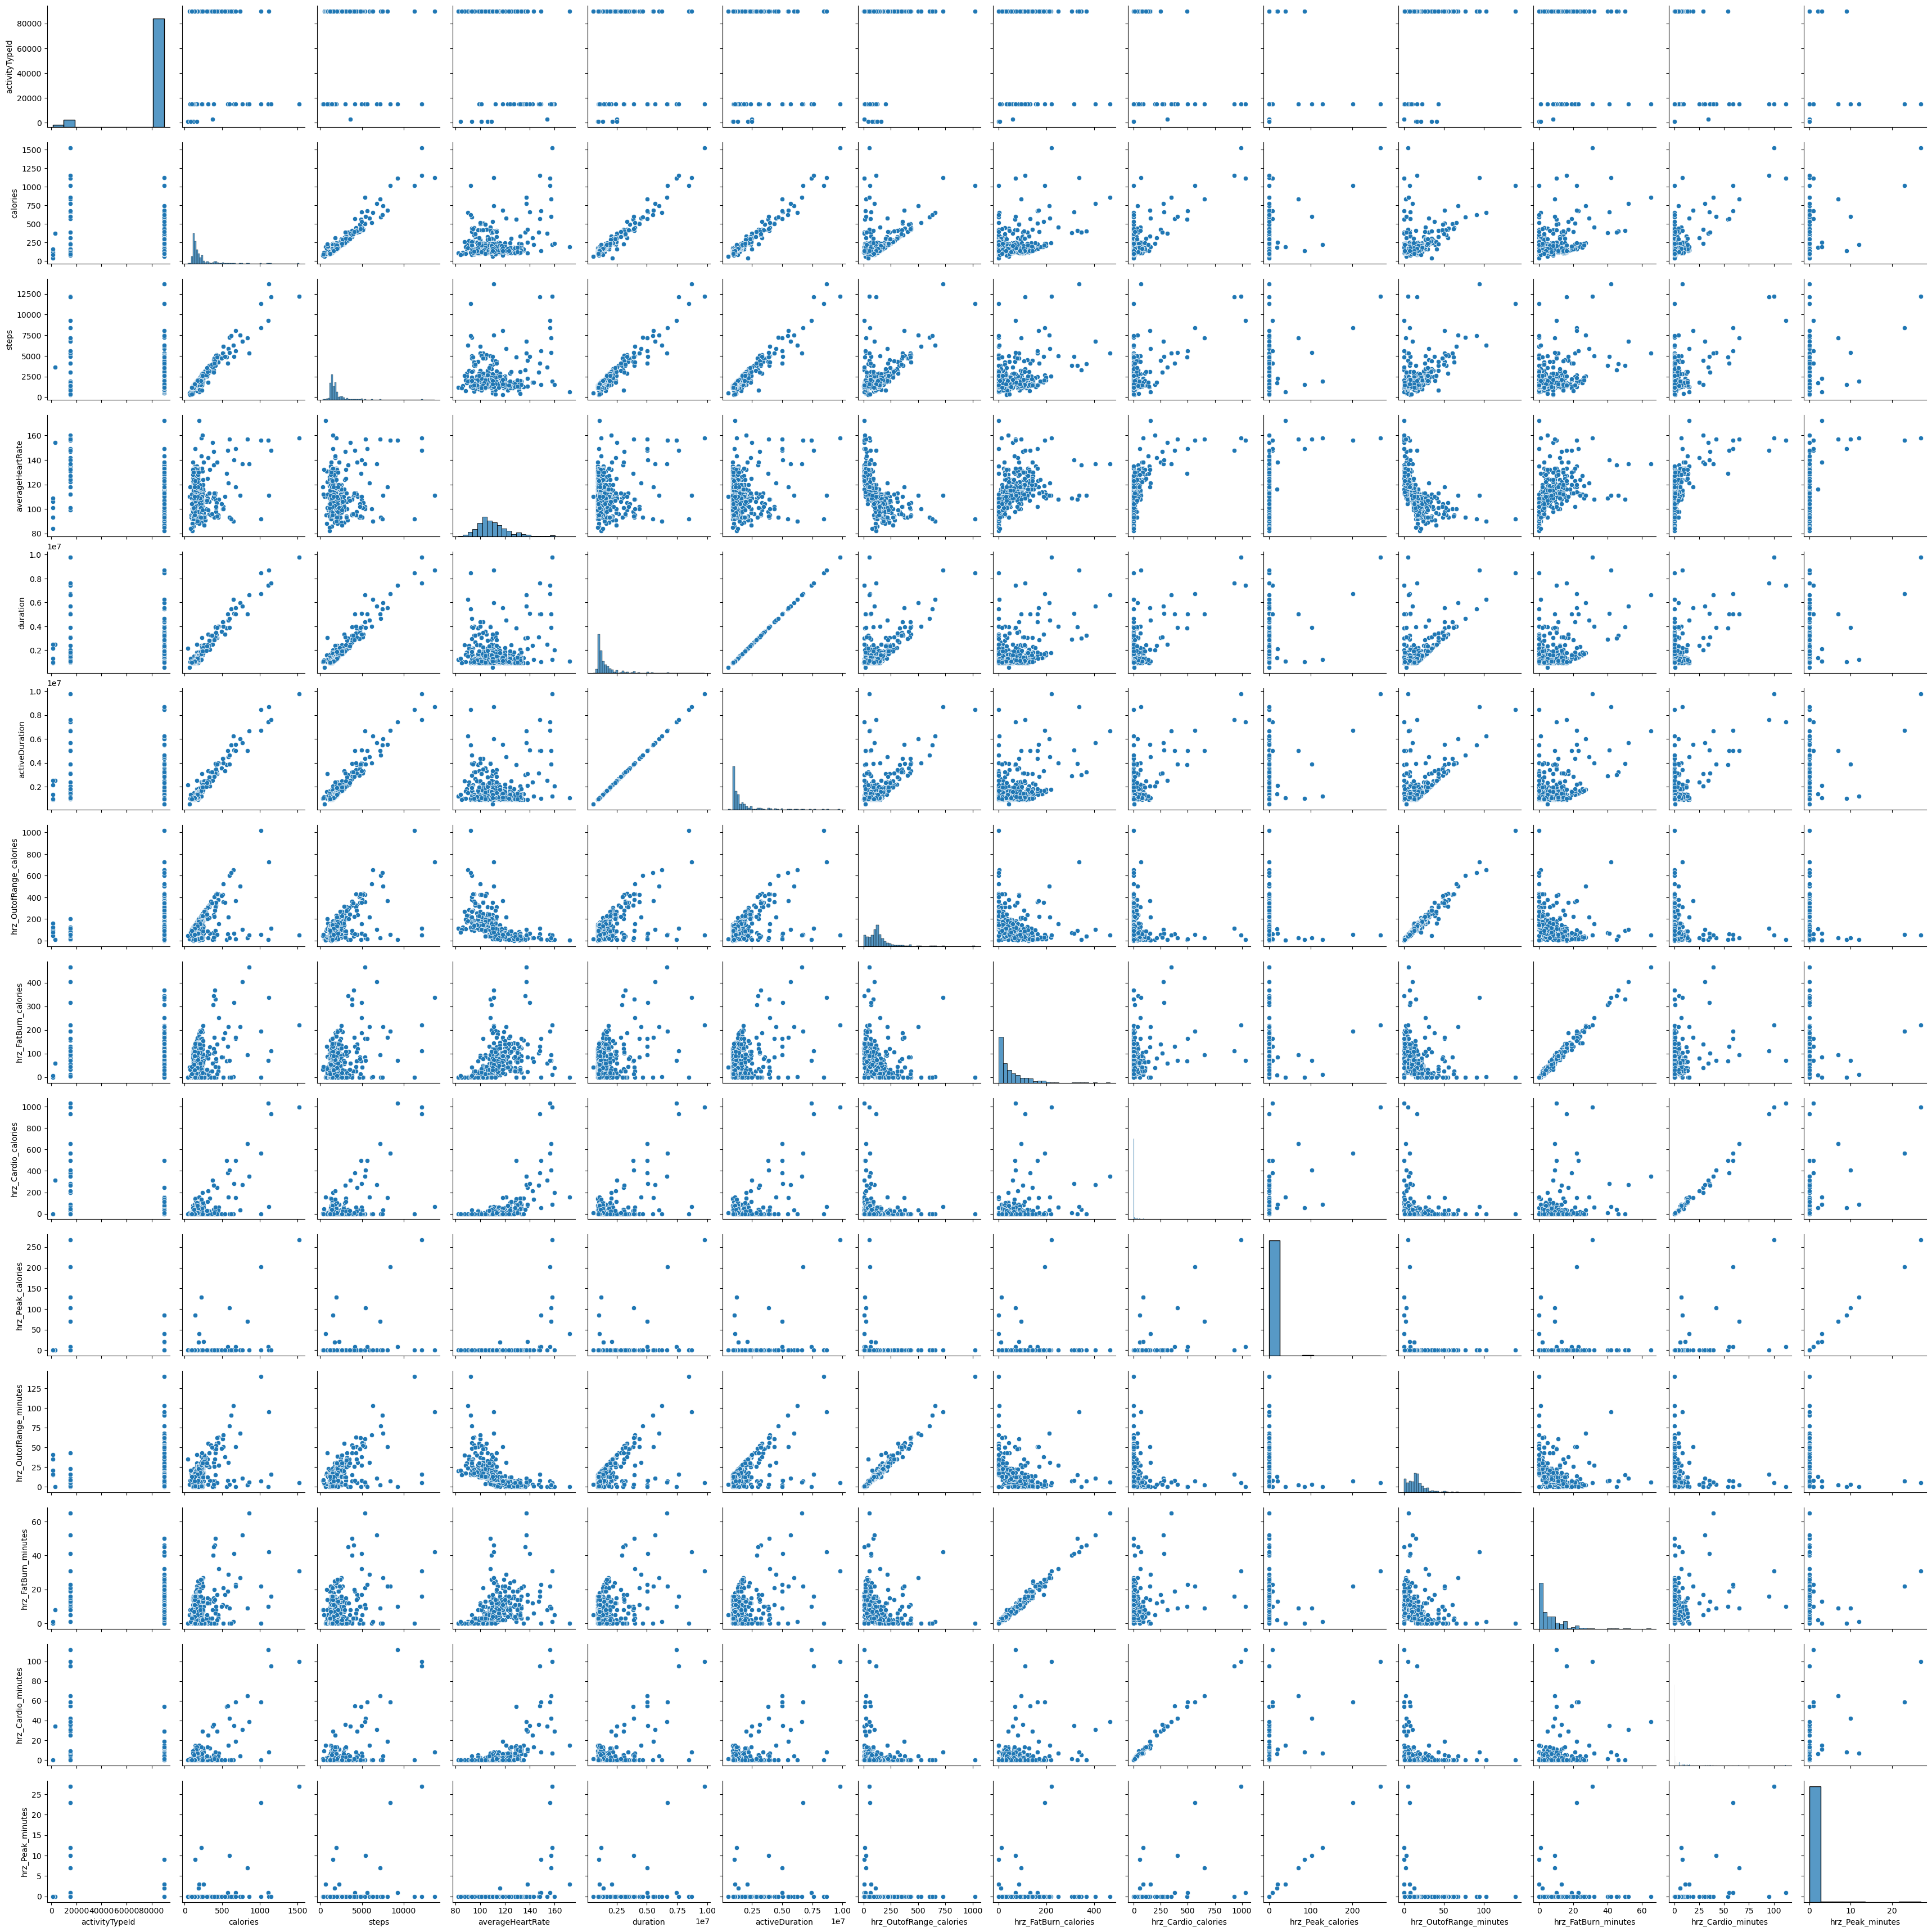

In [6]:
#scatter_matrix(activities_df, alpha=0.8, figsize=(12, 12), diagonal='kde')
sns.pairplot(activities_df)

plt.show()


1. Things worth exploring:
hrz_outofzone_calories with steps, duration, activeduration, 
2. It's clear that if ang heart zones increase the fatburn calories increase exponentially and out of range decreases exponentially. but cardio and peak show a weaker non-linear relationship. 
3. Many of the rest are linear relationships or no relationships. 

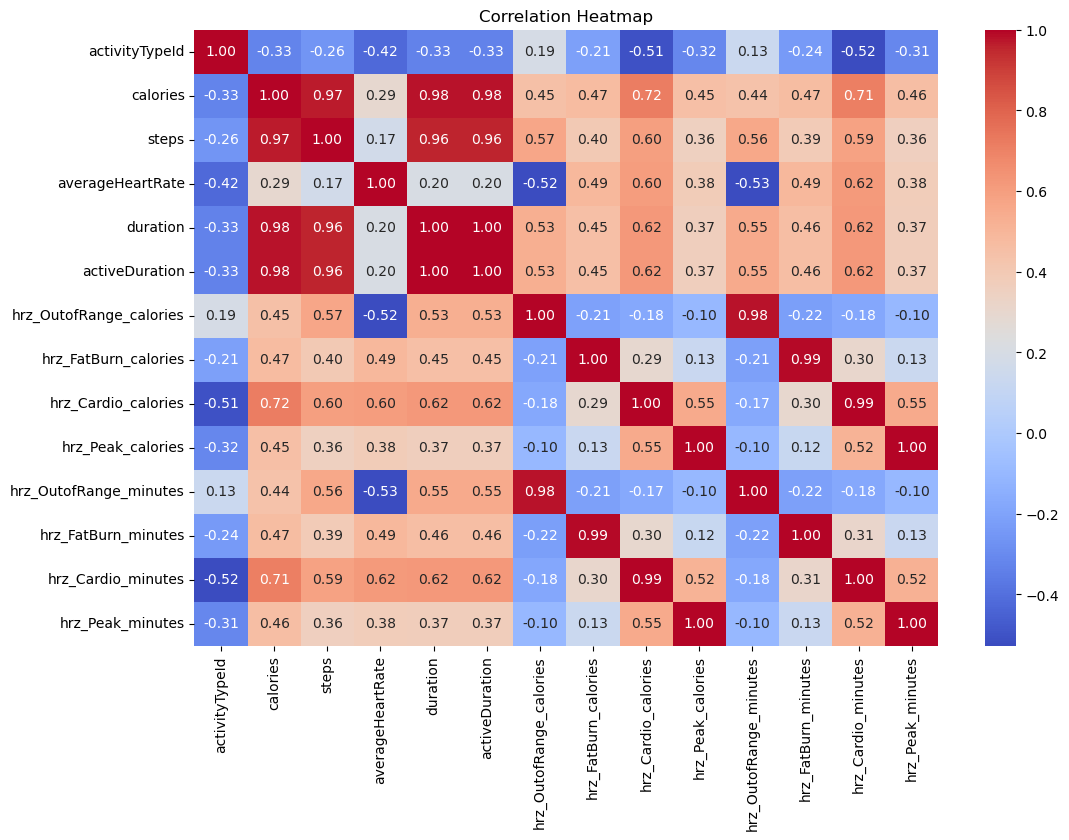

In [7]:
activities_numeric_df = activities_df.select_dtypes(include="number")

activities_corr = activities_numeric_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(activities_corr, annot=True, cmap="coolwarm", fmt=".2f")

plt.title("Correlation Heatmap")
plt.show()


1. Calories has a strong positive correlation with cardio minutes, calories, steps, duration
2. Steps also have a positive correlation with duration
3. average hear rate has half negative correlation with out of range calories
4. hrz cardio has the strongest correlation with calories than the rest of the zones 

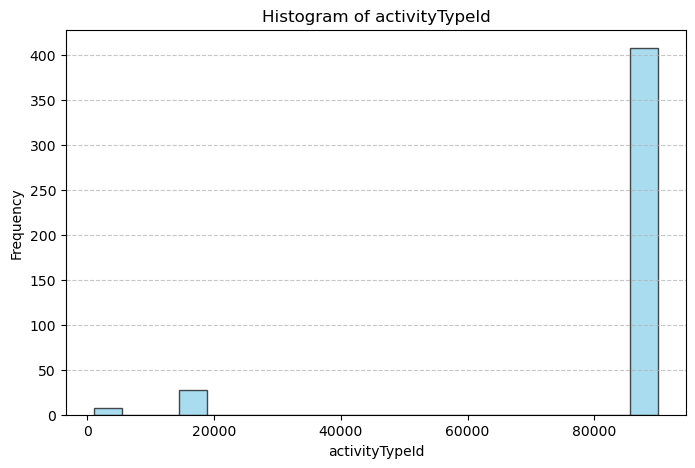

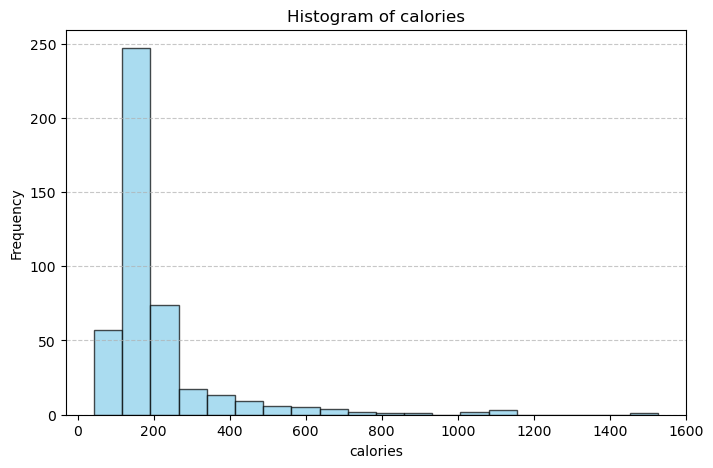

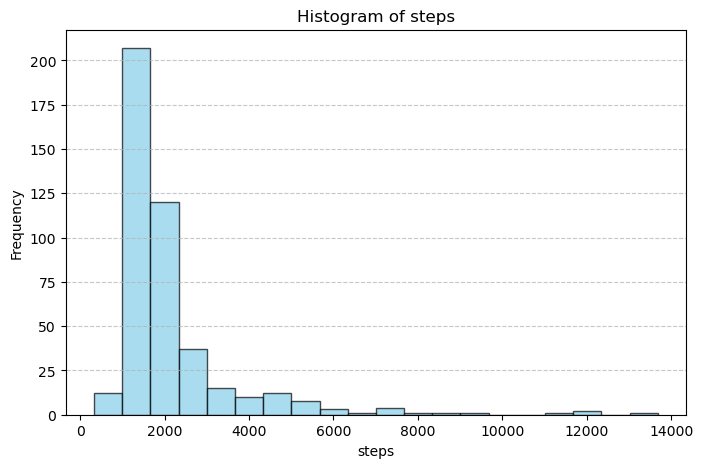

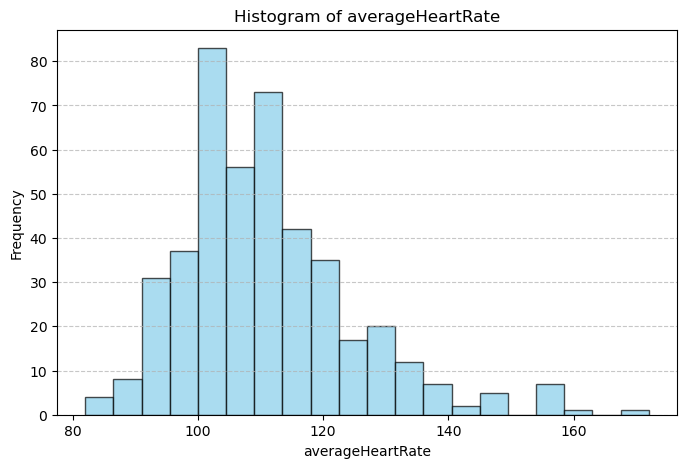

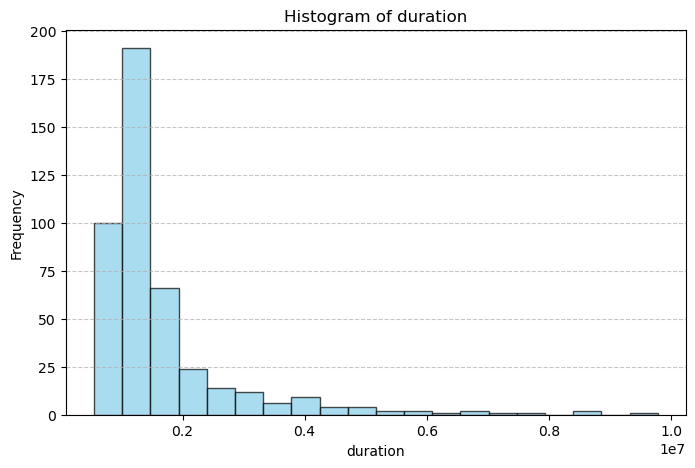

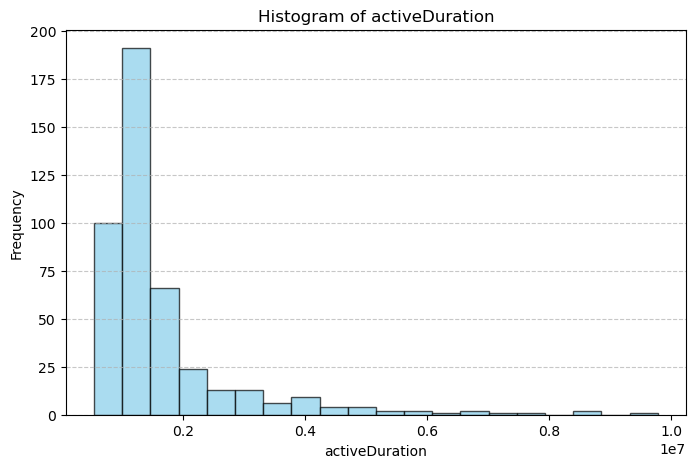

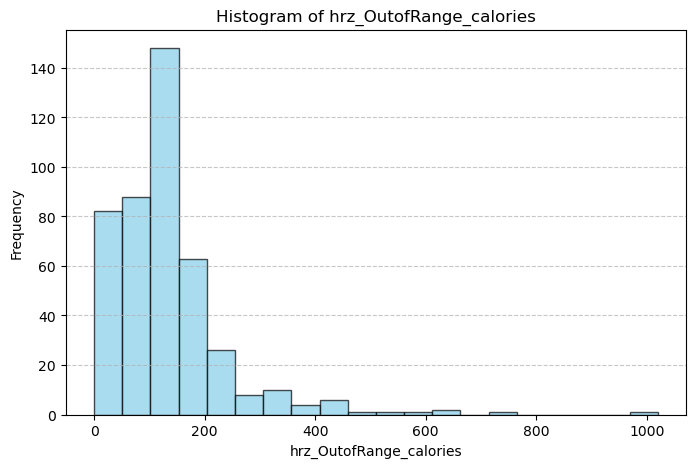

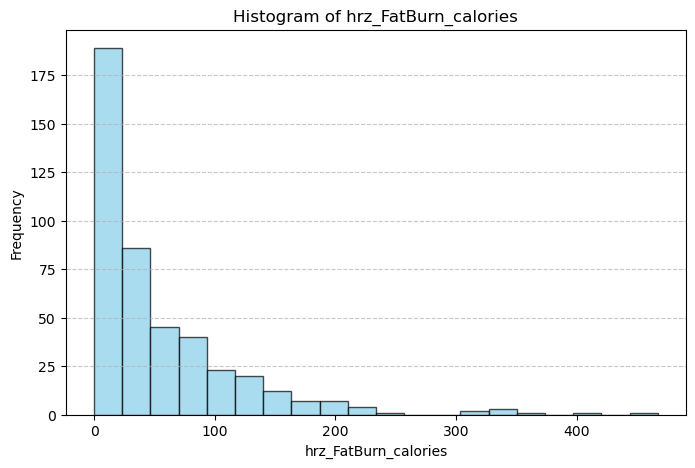

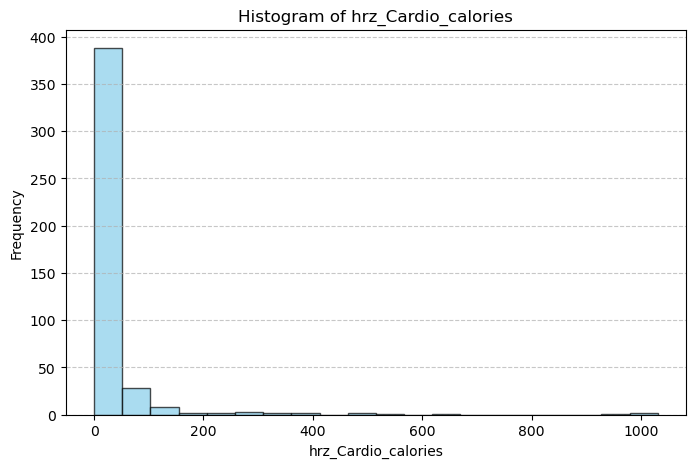

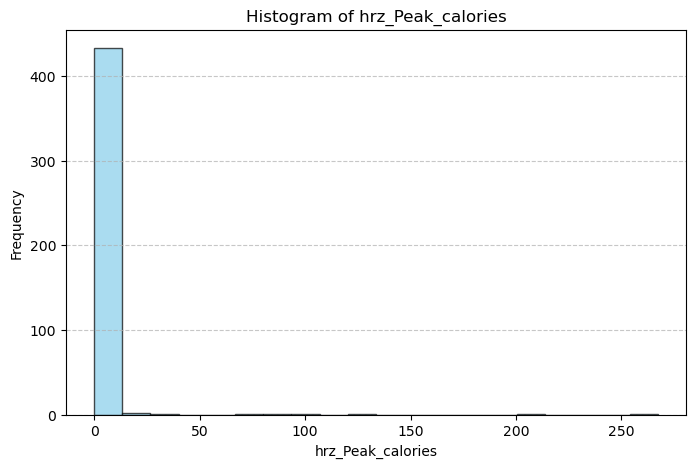

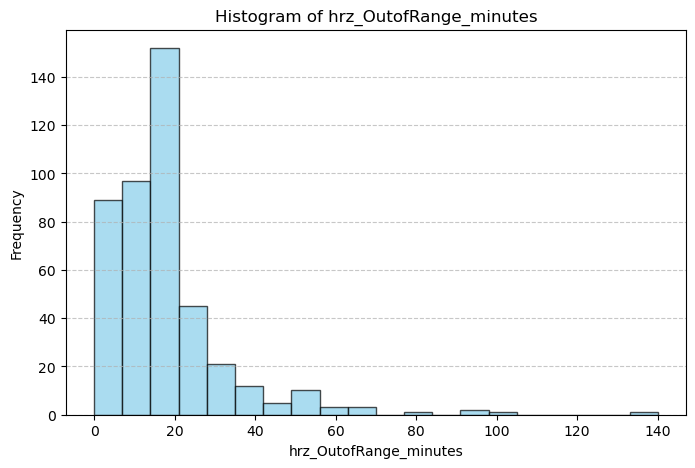

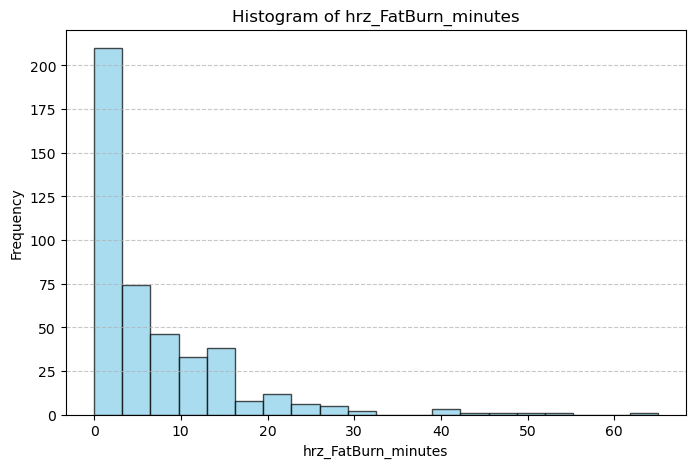

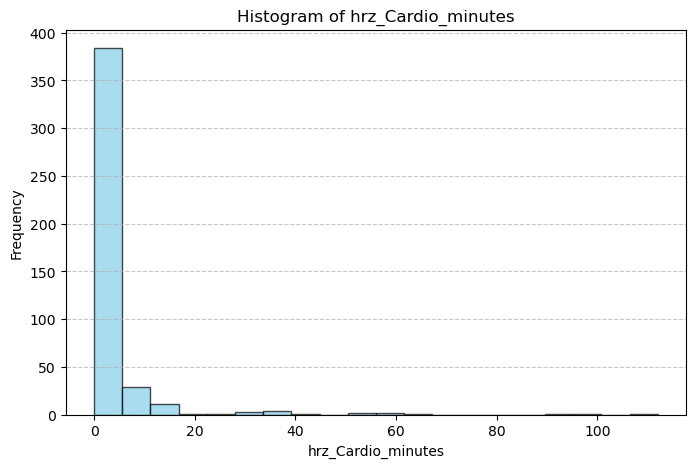

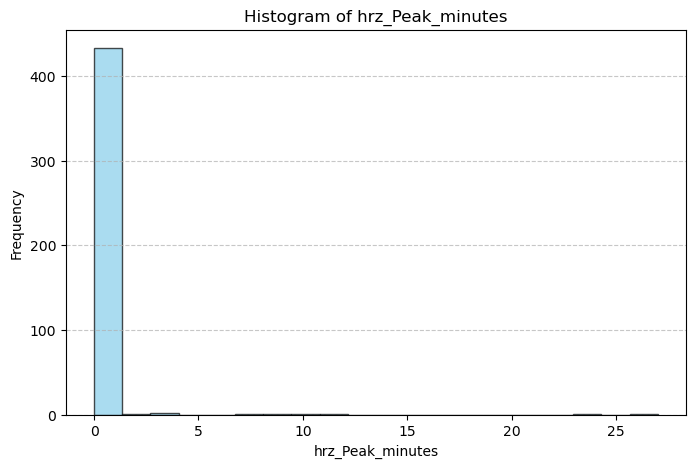

In [8]:
def histogram_plot(col, col_name):
    plt.figure(figsize=(8, 5))
    plt.hist(col.dropna(), bins=20, color='skyblue', edgecolor='black', alpha=0.7)
    plt.title(f'Histogram of {col_name}')
    plt.xlabel(col_name)
    plt.ylabel('Frequency')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()
    
for col_name in activities_numeric_df.columns:
    histogram_plot(activities_numeric_df[col_name], col_name)

There are a lot of outliers in this dataset, so I am going to make sure that I study those.

1. Per activity the common range is 100-270 calories 
2. Steps are around 2000, with the spike in frequency  <2000, and diminishes very quickly after 2500
3. Avg heartrate slight right tail skew norm distribution, mainly being from 90-120, remember that fat burn zone is from 100 - 140, and anything less than 100 is out of range. 
4. Main duration is 10-20-30 minutes, main spike being 20 minutes. 
5. hrz out of range burns 0-200 calories with main being a little less than <200 
6. hrz cardio calories <100 mainly, but has the highest correlation with calories in general.
7. hrz peak calories mainly 0, fatburn minutes 0-15, mainly 0, hrz carido and peak minutes as well

### how is hrz cardio minutes less than 20 minutes mainly, hrz cardio calories is < 200, mainly 0-80ish, and it has the highest correlation with calories out of all the zones?

Explore this question after looking at start time distributions 

Want to look at day of the week distributions, month

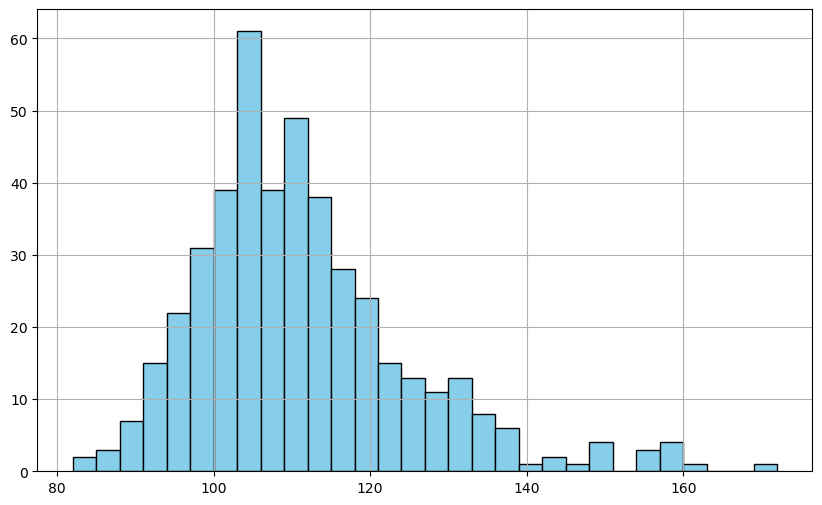

In [9]:
hist = activities_numeric_df['averageHeartRate'].hist(
    bins=30,
    figsize=(10, 6),
    color='skyblue',
    edgecolor='black',
    grid=True
)

Average Heart Rate is normal with a tail skewed to the left. Makes sense that the outliers are at the higher ends of the BPM.

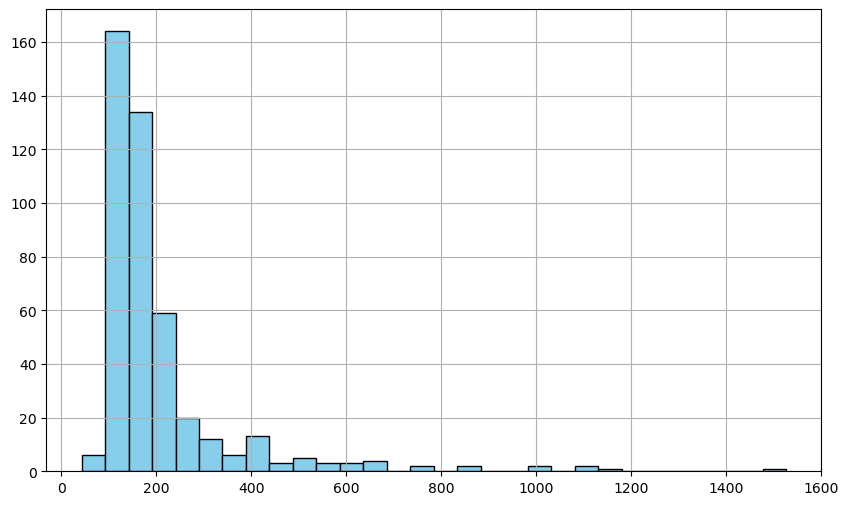

In [10]:
hist = activities_numeric_df['calories'].hist(
    bins=30,
    figsize=(10, 6),
    color='skyblue',
    edgecolor='black',
    grid=True
)


Calories is very much geared towards less than 200.

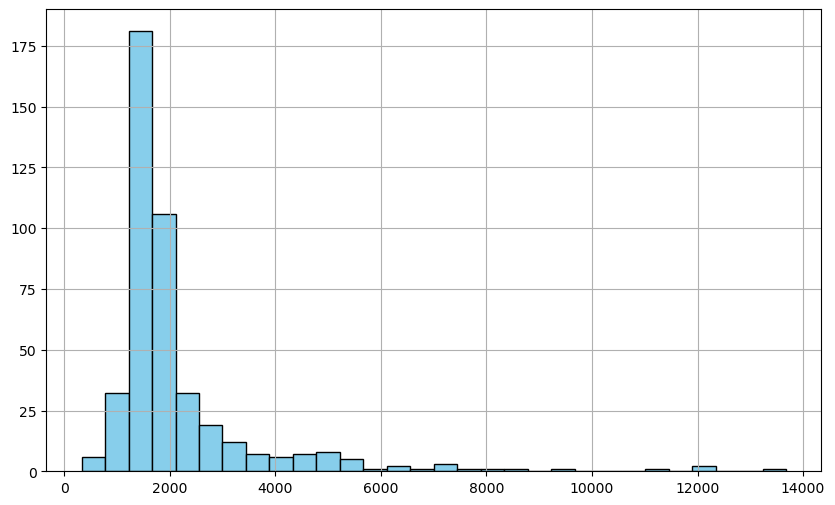

In [11]:
hist = activities_numeric_df['steps'].hist(
    bins=30,
    figsize=(10, 6),
    color='skyblue',
    edgecolor='black',
    grid=True
)

The # of steps is has a large spike at just below 2000, and then tapers off aggresively, suggesting anything above 3000 is not common.

In [12]:
activities_df['startTime'] = pd.to_datetime(activities_df['startTime'], utc=True)
activities_df['startTime'] = activities_df['startTime'].dt.tz_convert('America/New_York')
activities_df['time_only'] = activities_df['startTime'].dt.time
activities_df['seconds_since_midnight'] = (activities_df['startTime'].dt.hour * 3600 + 
                              activities_df['startTime'].dt.minute * 60 + 
                              activities_df['startTime'].dt.second)

# Create histogram
# plt.figure(figsize=(12, 6))
# plt.hist(activities_df['seconds_since_midnight'], 
#          bins=24,  # One bin per hour
#          color='skyblue', 
#          edgecolor='black',
#          alpha=0.7)

# # Customize x-axis to show hours instead of seconds
# plt.xticks(np.arange(0, 86400+1, 7200),  # 86400 seconds in a day, tick every 2 hours
#            [f'{x:02d}:00' for x in range(0, 24+1, 2)],
#            rotation=45)

# plt.title('Distribution of Activity Start Times', fontsize=14)
# plt.xlabel('Time of Day', fontsize=12)
# plt.ylabel('Frequency', fontsize=12)
# plt.grid(True, alpha=0.3)

# # Add some padding to the layout
# plt.tight_layout()

# Show plot
#plt.show()



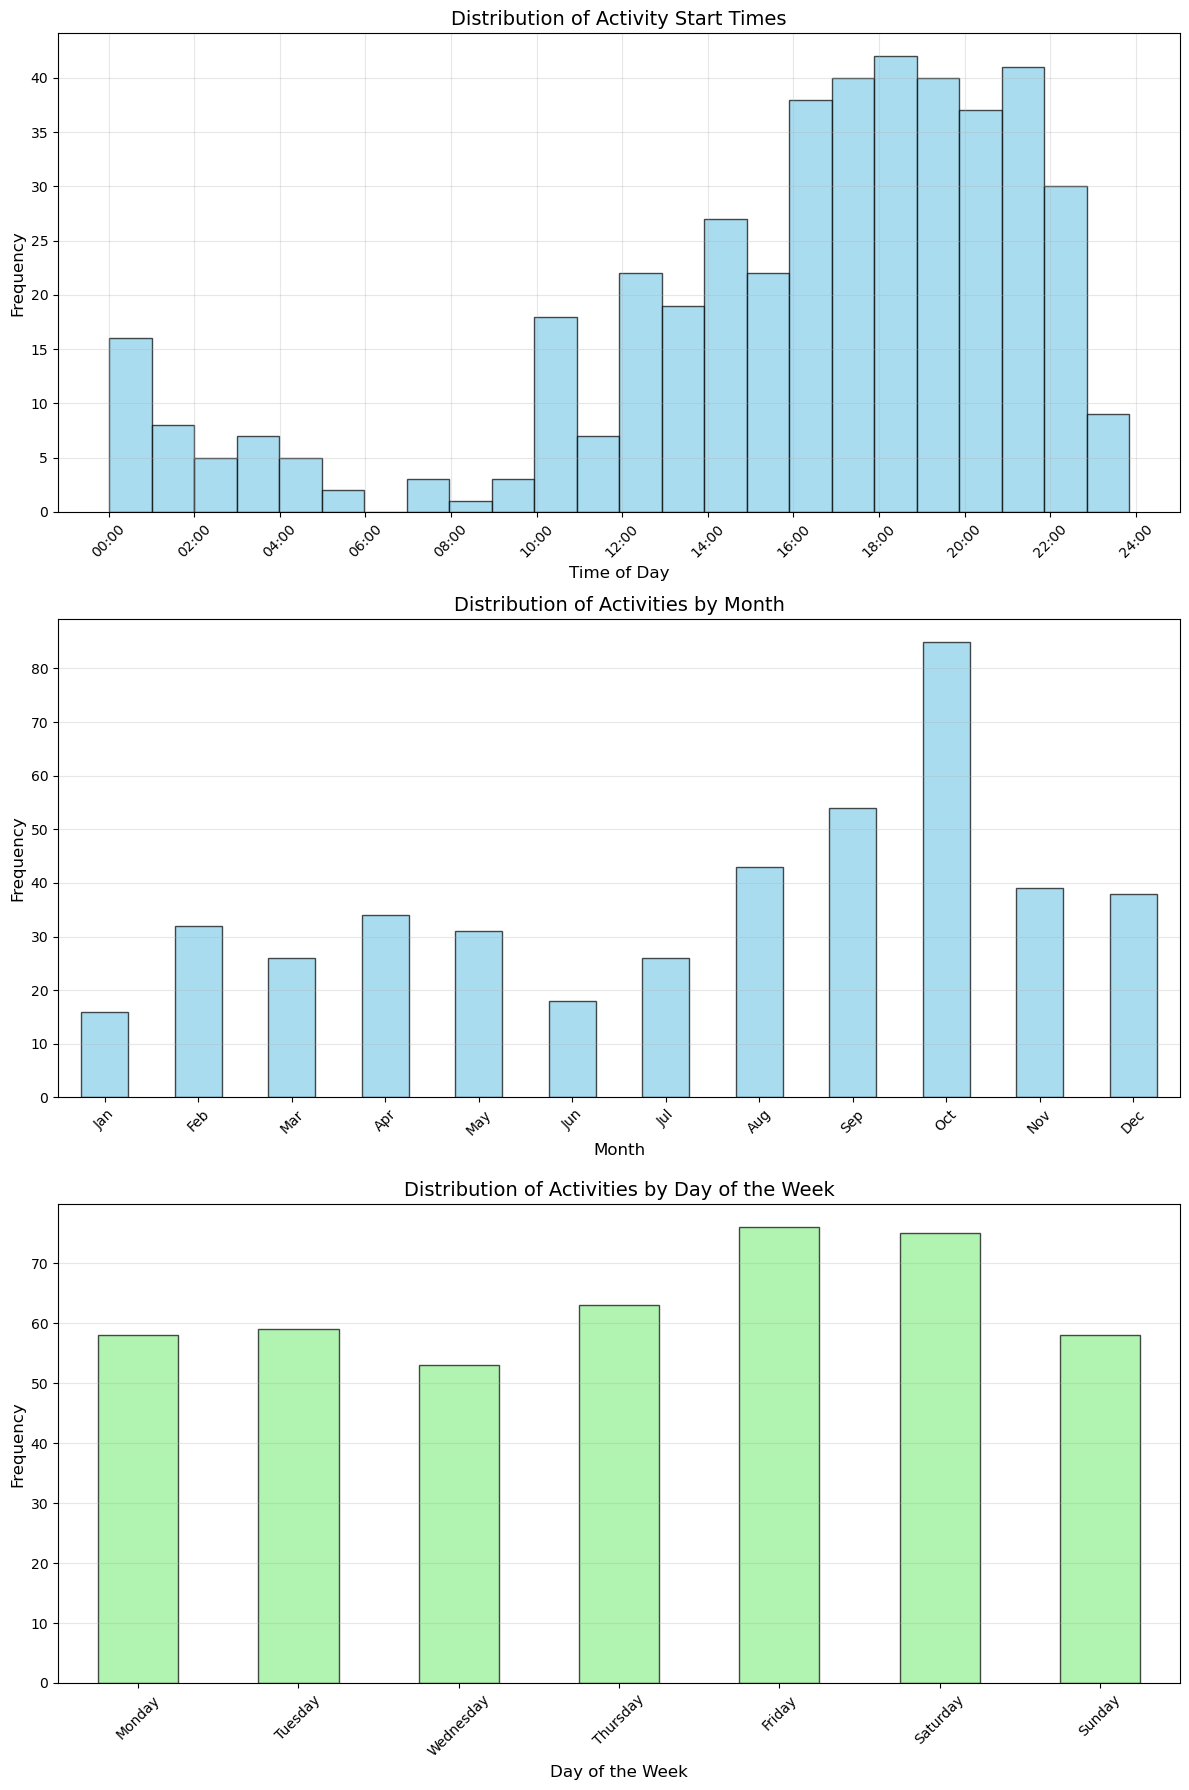

In [13]:
fig, axes = plt.subplots(3, 1, figsize=(12, 18))

# Time of day histogram
axes[0].hist(activities_df['seconds_since_midnight'], bins=24, color='skyblue', edgecolor='black', alpha=0.7)
axes[0].set_xticks(np.arange(0, 86400+1, 7200))
axes[0].set_xticklabels([f'{x:02d}:00' for x in range(0, 24+1, 2)], rotation=45)
axes[0].set_title('Distribution of Activity Start Times', fontsize=14)
axes[0].set_xlabel('Time of Day', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].grid(True, alpha=0.3)

# Month bar plot
activities_df['month'] = activities_df['startTime'].dt.month
activities_df['month'].value_counts().sort_index().plot(kind='bar', ax=axes[1], color='skyblue', edgecolor='black', alpha=0.7)
axes[1].set_title('Distribution of Activities by Month', fontsize=14)
axes[1].set_xlabel('Month', fontsize=12)
axes[1].set_ylabel('Frequency', fontsize=12)
axes[1].set_xticks(range(12))
axes[1].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
axes[1].grid(axis='y', alpha=0.3)

# Day of week bar plot
activities_df['day_of_week'] = activities_df['startTime'].dt.day_name()
activities_df['day_of_week'].value_counts().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
).plot(kind='bar', ax=axes[2], color='lightgreen', edgecolor='black', alpha=0.7)
axes[2].set_title('Distribution of Activities by Day of the Week', fontsize=14)
axes[2].set_xlabel('Day of the Week', fontsize=12)
axes[2].set_ylabel('Frequency', fontsize=12)
axes[2].set_xticks(range(7))
axes[2].set_xticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], rotation=45)
axes[2].grid(axis='y', alpha=0.3)

# Add padding to layout
plt.tight_layout()

# Show combined plot
plt.show()


Activities increase as the day progresses. Would be interesting to see what this looks like in accordance to what time I wake up. Explanations for late activities is going to the gym late, or late night walks, something I do often.
Also interestingly, my activities count increases when im in school. Intuitively it would increase when im not, because i would have more time when im at home, but i think things like walking to class, or walking to the dining hall accounts for a large portion of my activities in the form of walking. 

We can also see that there is a spike in activities done on fridays and saturdays. There are normally the days where I have work, or hangout with friends, so those could be possible explainations. It would also support the fact that the timing of the activities are later in the day. 

# Breathing Rate, Heart Rate Variability, Skin Temp basic analysis

In [14]:
br_df = pd.read_csv(data_path + 'initial_clean_br.csv')
hrv_df = pd.read_csv(data_path + 'initial_clean_hrv.csv')
skin_df = pd.read_csv(data_path + 'initial_clean_tempSkin.csv')

simple_dfs = {'Breathing Rate':br_df, 'Heart Rate Variability':hrv_df, 'Skin Temp':skin_df}


In [15]:
for key, df in simple_dfs.items():
    print(key)
    print(df.describe())
    print()

Breathing Rate
       value.breathingRate
count           338.000000
mean             13.837278
std               0.692071
min              12.200000
25%              13.400000
50%              13.800000
75%              14.200000
max              16.600000

Heart Rate Variability
       value.dailyRmssd  value.deepRmssd
count        339.000000       339.000000
mean          66.362086        71.976552
std           19.021005        24.816611
min            0.000000         0.000000
25%           53.002000        57.788000
50%           63.205000        67.671000
75%           78.373000        82.426500
max          135.386000       291.015000

Skin Temp
       value.nightlyRelative
count             334.000000
mean               -0.023054
std                 0.690068
min                -2.000000
25%                -0.475000
50%                 0.000000
75%                 0.500000
max                 1.600000



Breathing Rate: # of breaths per minute 

Heart Rate Variability: The variance of time in between heart beats in root mean squared of successive differences. High RMSSD is better.

Skin Temp: ... temperature of skin... this measuire is a +/- of the 30 day average temp baseline

In [16]:
def plot_histogram(df, col):
    plt.figure(figsize=(8, 5))
    
    # Histogram
    plt.hist(df[col], bins=20, color='skyblue', edgecolor='black', alpha=0.7, density=True)
    
    # Smooth line (Kernel Density Estimate)
    sns.kdeplot(df[col], color='red', linewidth=2, label='Density Curve')
    
    # Titles and labels
    plt.title(f'Distribution of {col}', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Density', fontsize=12)
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

f:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


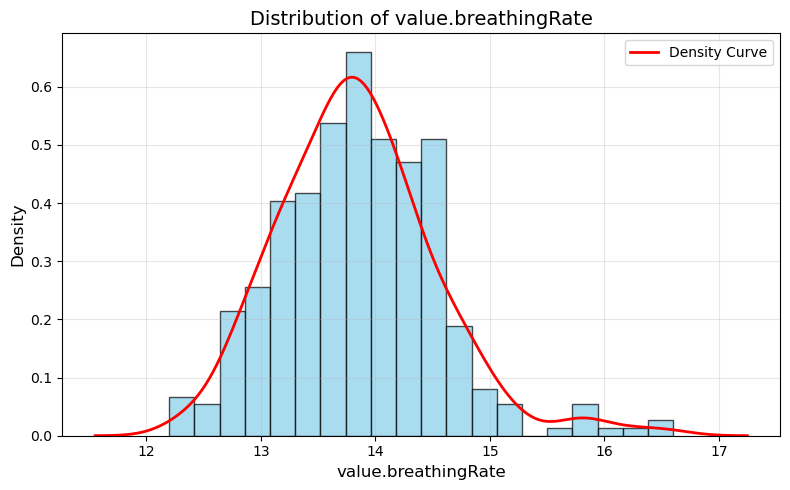

f:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


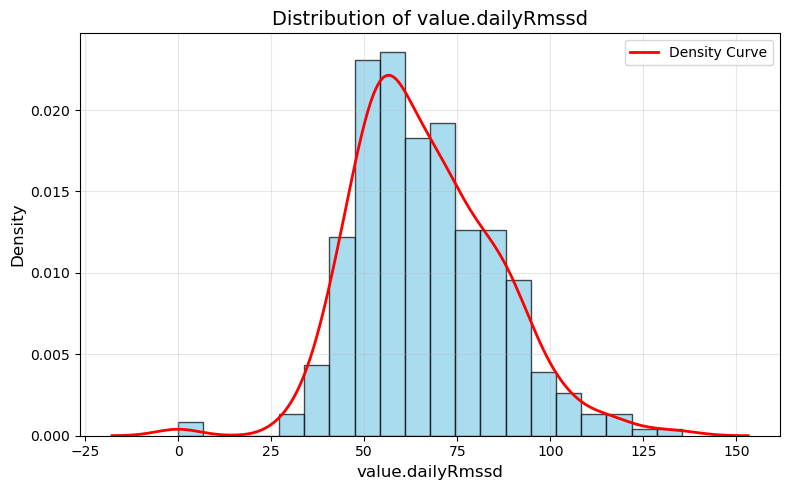

f:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


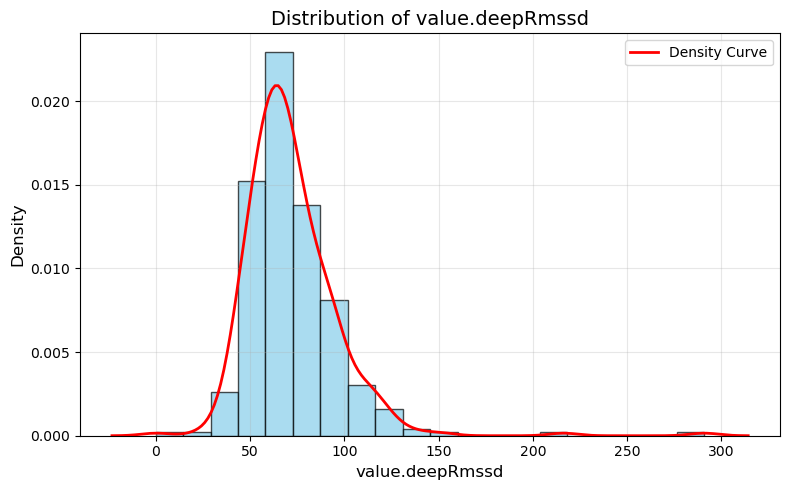

f:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


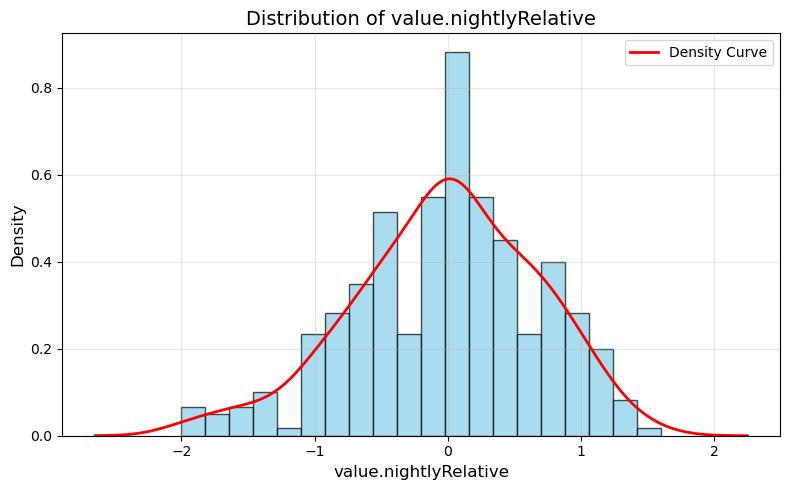

In [17]:
for key, df in simple_dfs.items():
    for col in df.columns[1:]:
        plot_histogram(df, col)

We can see that they are all normally distributed, with daily and deep rmssd being skewed to the right a little, meaning the mean is less than the median. Most likely due to the outliers. 

It would be interesting to see if the outliers are correlated to anything else in the multivariate analysis.

The breathing rate is within the normal range. A good portion of the rmssds are above average (which is good) and the rest is within acceptable intervals. There seems to be outliers near 0, but i wonder if they are actually outliers.

the skin temp also indicates acceptable ranges, with > +/- 1 is indicative of stress

Next to do is: 

Sleep anaylsis 

Google form 

myfitnessplan

In [41]:
sleep_levels_df = pd.read_csv(data_path + 'intial_clean_sleep_levels.csv')
sleep_gen_df = pd.read_csv(data_path + 'initial_clean_sleep.csv')
sleep_score_df = pd.read_csv(data_path + 'sleep_score.csv')

sleep_dfs = {"General Sleep Data" : sleep_gen_df, "Sleep Levels Data" : sleep_levels_df, "Sleep Score Data" : sleep_score_df}

In [42]:
for key, df in sleep_dfs.items():
    print(key)
    print(df.describe())
    print()

General Sleep Data
           duration  efficiency  minutesAsleep  minutesAwake   timeInBed  \
count  3.520000e+02  352.000000     352.000000    352.000000  352.000000   
mean   2.685869e+07   93.377841     391.264205     56.360795  447.644886   
std    5.310686e+06    2.423030      77.322694     15.469037   88.511441   
min    4.140000e+06   83.000000      69.000000      0.000000   69.000000   
25%    2.530500e+07   92.000000     366.000000     48.000000  421.750000   
50%    2.748000e+07   94.000000     401.500000     57.000000  458.000000   
75%    2.952000e+07   95.000000     431.250000     65.250000  492.000000   
max    3.966000e+07  100.000000     570.000000     92.000000  661.000000   

       sc_deep_count  sc_deep_minutes  sc_deep_thirtyDayAvgMinutes  \
count     339.000000       339.000000                   339.000000   
mean        3.914454        85.359882                    85.147493   
std         1.255189        21.458098                    11.671366   
min         1.00

In [43]:
for key, df in sleep_dfs.items():
    print(df.columns)
    print()

Index(['dateOfSleep', 'duration', 'efficiency', 'isMainSleep', 'minutesAsleep',
       'minutesAwake', 'startTime', 'timeInBed', 'sc_deep_count',
       'sc_deep_minutes', 'sc_deep_thirtyDayAvgMinutes', 'sc_light_count',
       'sc_light_minutes', 'sc_light_thirtyDayAvgMinutes', 'sc_rem_count',
       'sc_rem_minutes', 'sc_rem_thirtyDayAvgMinutes', 'sc_wake_count',
       'sc_wake_minutes', 'sc_wake_thirtyDayAvgMinutes', 'sc_asleep_count',
       'sc_asleep_minutes', 'sc_awake_count', 'sc_awake_minutes',
       'sc_restless_count', 'sc_restless_minutes', 'datetime_key',
       'overall_score', 'composition_score', 'revitalization_score',
       'duration_score', 'resting_heart_rate', 'restlessness', 'sleep_id'],
      dtype='object')

Index(['sleep_id', 'short', 'dateTime', 'level', 'seconds'], dtype='object')

Index(['sleep_log_entry_id', 'timestamp', 'overall_score', 'composition_score',
       'revitalization_score', 'duration_score', 'deep_sleep_in_minutes',
       'resting_heart_r

In [44]:
#filter sleeps to only main sleeps, meaning i exclude things like naps. 
sleep_gen_df = sleep_gen_df[sleep_gen_df['isMainSleep']]

In [45]:
#in sleep_gen
#line graph for the thirtyday avgs
#distribution plots for the counts and scores
#box plots for the minutes regular

#plot_histogram()

In [46]:
def plot_histograms(df, cols):
    """
    Plots histograms with density curves for multiple columns in one figure.
    
    Args:
        df (DataFrame): The data to plot.
        cols (list): List of column names to include in the plot.
    """
    plt.figure(figsize=(12, 6))
    
    for col in cols:
        # Histogram with density
        sns.histplot(df[col], bins=20, kde=True, label=f'{col} Histogram', alpha=0.5)
    
    # Titles and labels
    plt.title('Distribution of Multiple Columns', fontsize=16)
    plt.xlabel('Values', fontsize=14)
    plt.ylabel('Density', fontsize=14)
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

def plot_multiple_histograms(df, cols, bins=20):
    """
    Plots multiple single-variable histograms in a single figure using subplots.
    
    Args:
        df (DataFrame): The data to plot.
        cols (list): List of column names to include in the histograms.
        bins (int): Number of bins for the histograms.
    """
    num_cols = len(cols)
    fig, axes = plt.subplots(1, num_cols, figsize=(5 * num_cols, 5), sharey=True)
    
    for i, col in enumerate(cols):
        sns.histplot(df[col], bins=bins, kde=True, ax=axes[i], color='skyblue', edgecolor='black')
        axes[i].set_title(f'Distribution of {col}', fontsize=14)
        axes[i].set_xlabel(col, fontsize=12)
        axes[i].set_ylabel('Density', fontsize=12)
        axes[i].grid(alpha=0.3)
    
    # Adjust layout to prevent overlap
    plt.tight_layout()
    plt.show()

def plot_lines(df, cols):
    """
    Plots line graphs for multiple columns in one figure.
    
    Args:
        df (DataFrame): The data to plot.
        cols (list): List of column names to include in the plot.
    """
    plt.figure(figsize=(12, 6))
    
    for col in cols:
        plt.plot(df.index, df[col], label=col, linewidth=2)
    
    # Titles and labels
    plt.title('Line Graph of Multiple Columns', fontsize=16)
    plt.xlabel('Index', fontsize=14)
    plt.ylabel('Values', fontsize=14)
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()


def plot_boxplots(df, cols):
    """
    Plots box plots for multiple columns in one figure.
    
    Args:
        df (DataFrame): The data to plot.
        cols (list): List of column names to include in the box plots.
    """
    plt.figure(figsize=(12, 6))
    
    # Create box plots
    sns.boxplot(data=df[cols], palette="Set2")
    
    # Titles and labels
    plt.title('Box Plots of Selected Columns', fontsize=16)
    plt.xlabel('Columns', fontsize=14)
    plt.ylabel('Values', fontsize=14)
    plt.grid(axis='y', alpha=0.3)  # Add a grid to make comparisons easier
    plt.tight_layout()
    
    plt.show()



f:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
f:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
f:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
f:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_

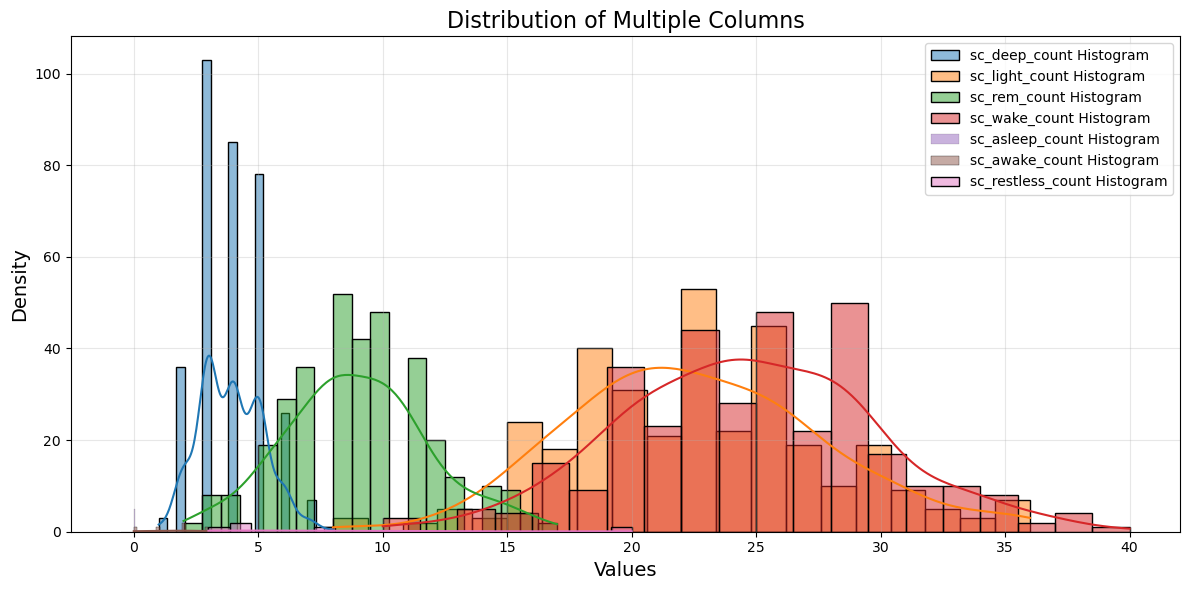

f:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
f:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
f:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
f:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_

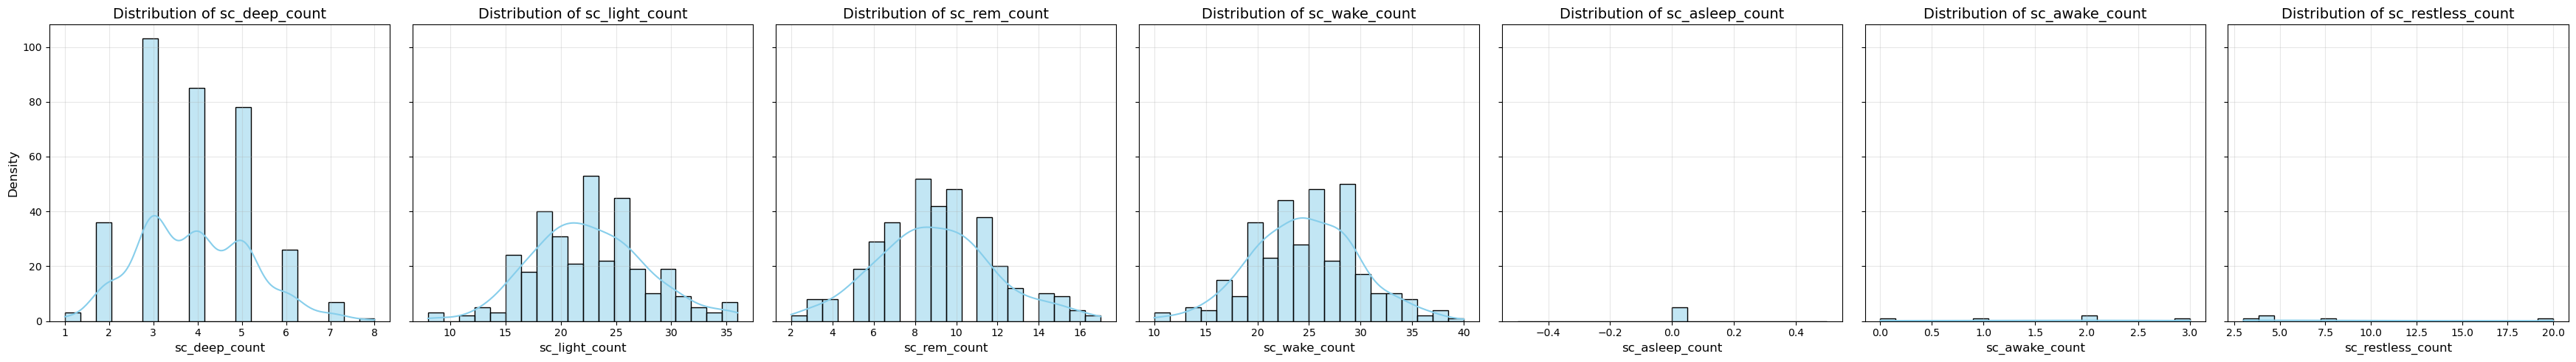

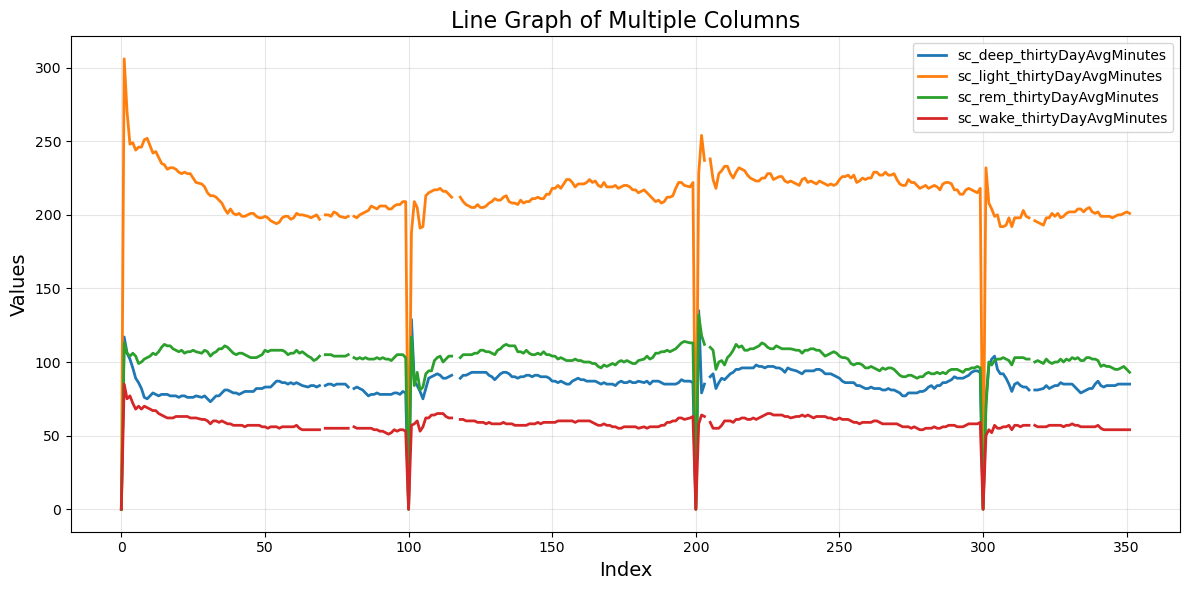

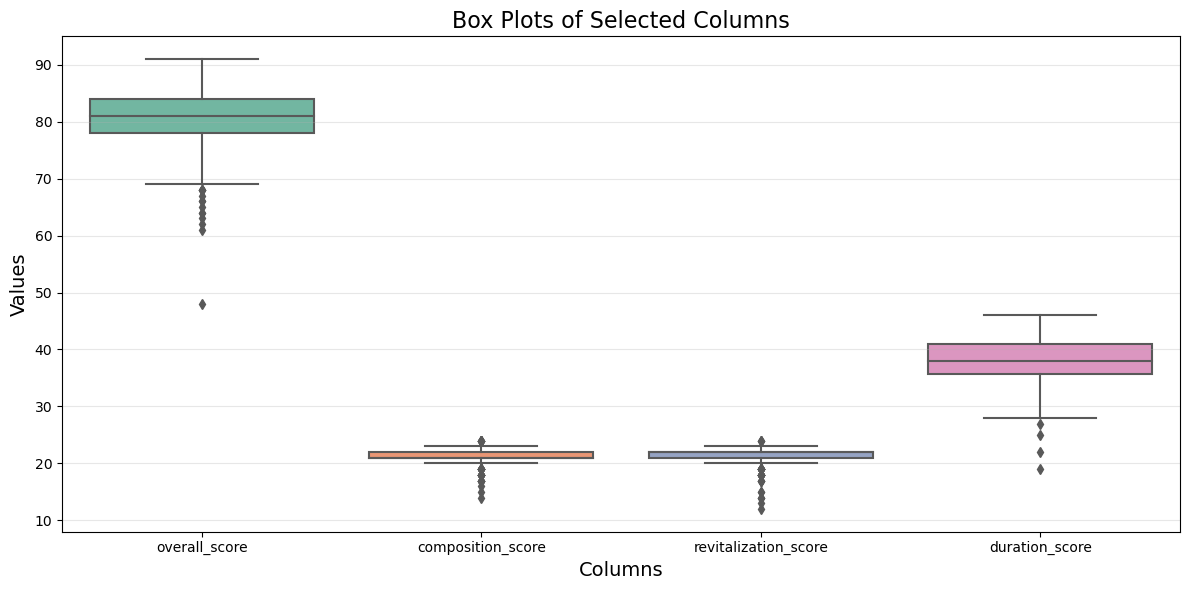

In [47]:
#make a loop that categorizes the columns for plotting based off the name 
line_plot = []
distribution_plot = []
box_plot = []

for col in sleep_gen_df.columns:
    if "thirtyDayAvg" in col:
        line_plot.append(col)
    elif "_count" in col:
        distribution_plot.append(col)
    elif "_score" in col or "_count" in col:
        box_plot.append(col)

plot_histograms(sleep_gen_df, distribution_plot)
plot_multiple_histograms(sleep_gen_df, distribution_plot)
plot_lines(sleep_gen_df, line_plot)
plot_boxplots(sleep_gen_df, box_plot)

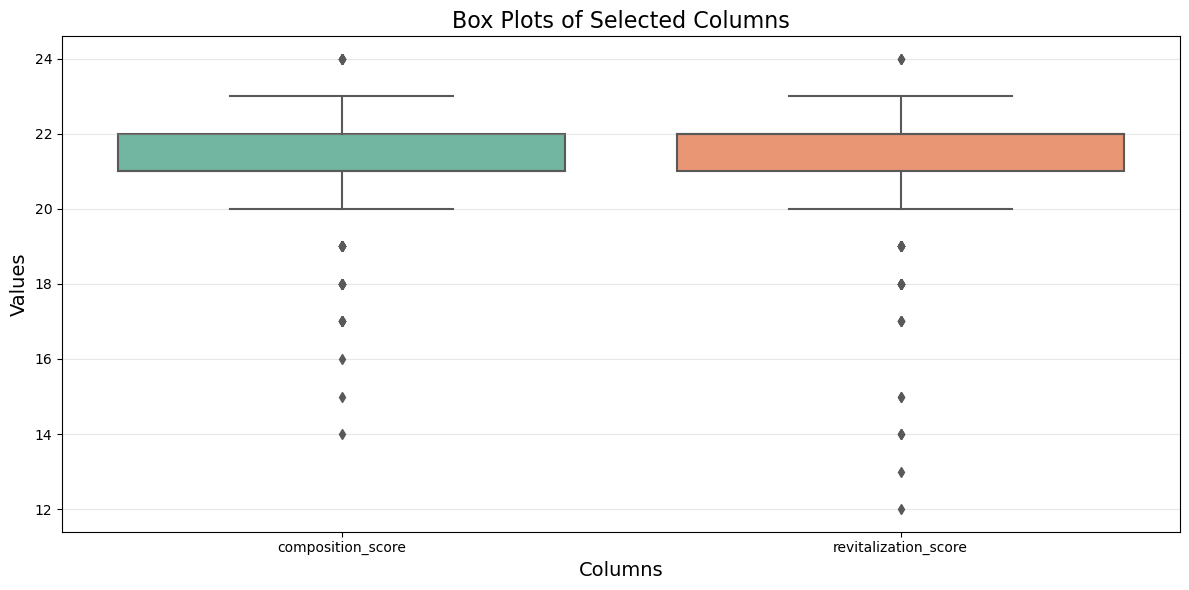

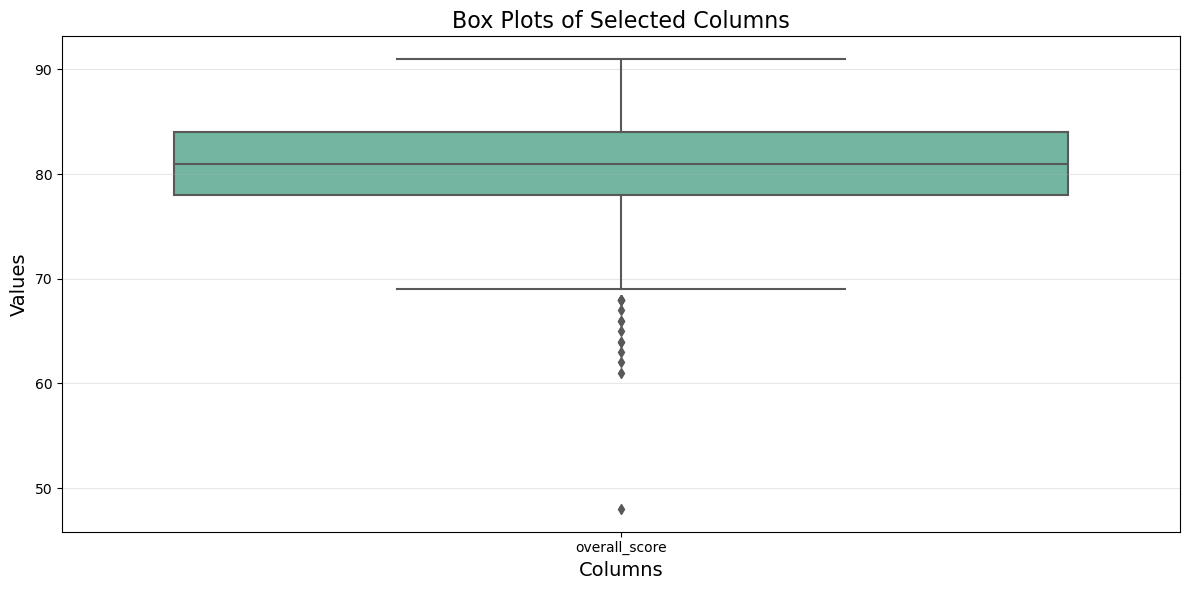

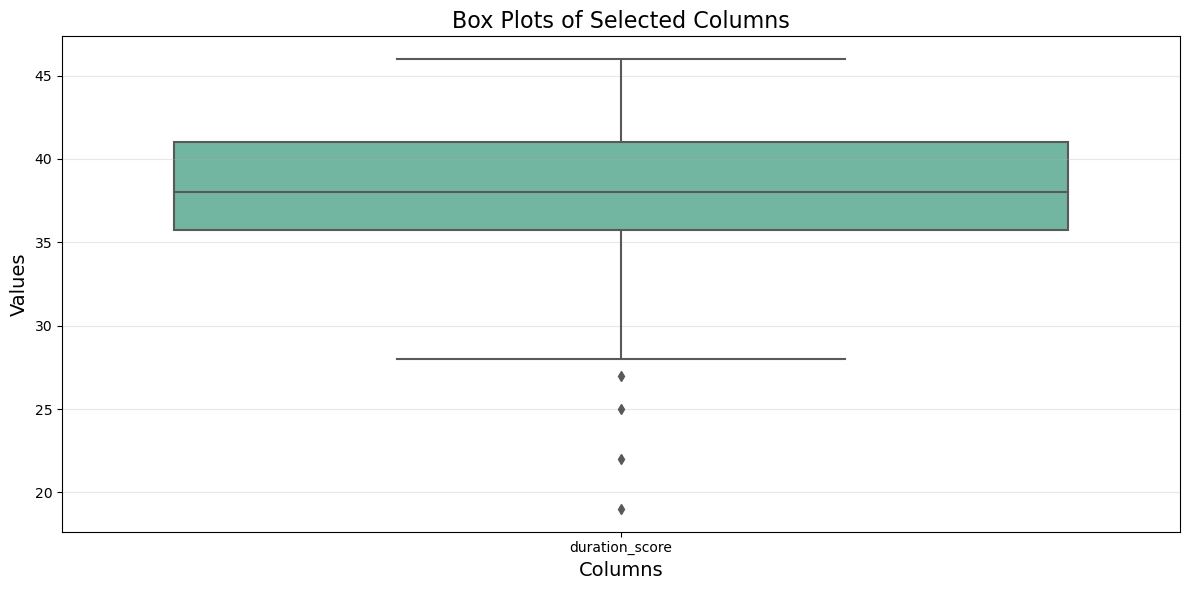

In [48]:
plot_boxplots(sleep_gen_df, ['composition_score', 'revitalization_score'])
plot_boxplots(sleep_gen_df, ['overall_score'])
plot_boxplots(sleep_gen_df, ['duration_score'])

We can see that all the counts and such are all normally distributed, with differing values, suggesting inverse correlation (but doesnt mean so)
Asleep, wake, and restless count are not worthy of looking at distributions. However, they still might be worth looking into in terms of outliers.

The line plots were interesting. The first 30 days seem to be a little messed up because the rolling average wasn't set yet, and also every 100 days they reset. Days 200 - 300 saw the highest light sleep, and although the lines generally seem correlated to eachother, there are periods where rem is flat but deep is increasing, and light is decreasing. These days where the correlations are not following the regular pattern might be interesting to study. 

To be honest, after plotting it I realised that the scores have different ranges, so thats why we see different plot sets. 
The revitalization and composition scores plots are basically the same, with a few more outliers in the revitalization scores to the downside, none to the upside for any of the plots. Universally for all plots, I have never hit the maximum for any of the categories. All seem normally distributed around their ranges. 

This preliminary analysis makes me curious about the outliers, as well as some possible places to look.

In [49]:
sleep_levels_df = sleep_levels_df[sleep_levels_df["sleep_id"].isin(set(sleep_gen_df["sleep_id"]))]
sleep_levels_df.head(10)

,sleep_id,short,dateTime,level,seconds
0,1,False,2023-11-23T02:29:30.000,wake,300
1,1,False,2023-11-23T02:34:30.000,light,330
2,1,False,2023-11-23T02:40:00.000,deep,3480
3,1,False,2023-11-23T03:38:00.000,light,390
4,1,False,2023-11-23T03:44:30.000,deep,270
5,1,False,2023-11-23T03:49:00.000,wake,480
6,1,False,2023-11-23T03:57:00.000,light,90
7,1,False,2023-11-23T03:58:30.000,deep,1110
8,1,False,2023-11-23T04:17:00.000,wake,210
9,1,False,2023-11-23T04:20:30.000,light,1110


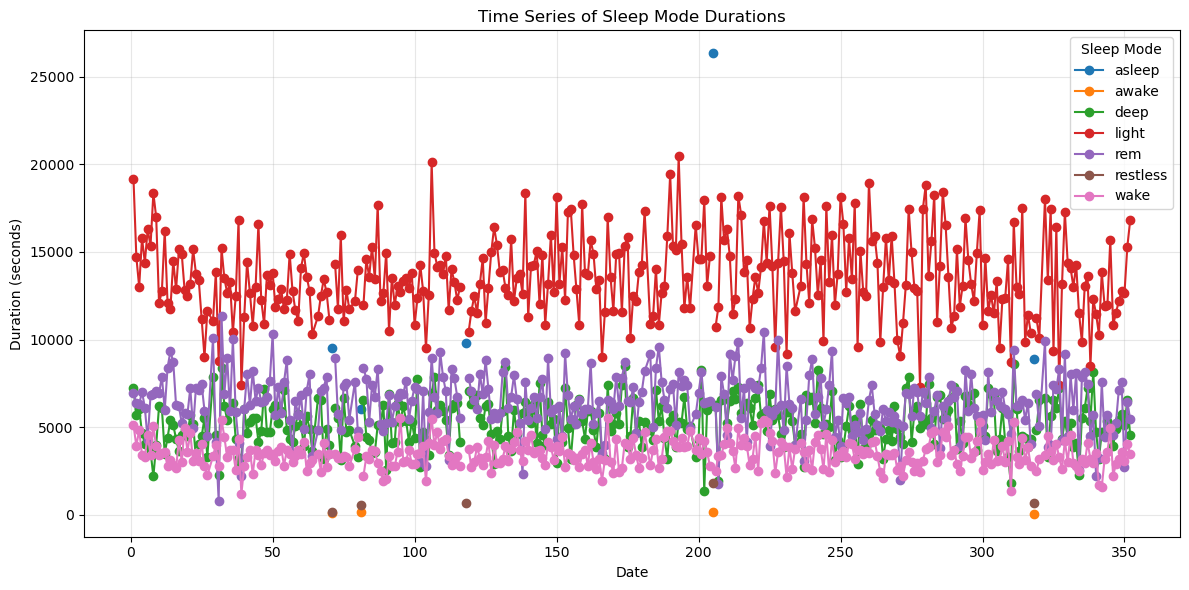

In [50]:
time_series_data = sleep_levels_df.groupby(['sleep_id', 'level'])['seconds'].sum().unstack()

# Plot time series
plt.figure(figsize=(12, 6))
for mode in time_series_data.columns:
    plt.plot(time_series_data.index, time_series_data[mode], label=mode, marker='o')

plt.title('Time Series of Sleep Mode Durations')
plt.xlabel('Date')
plt.ylabel('Duration (seconds)')
plt.legend(title='Sleep Mode')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()



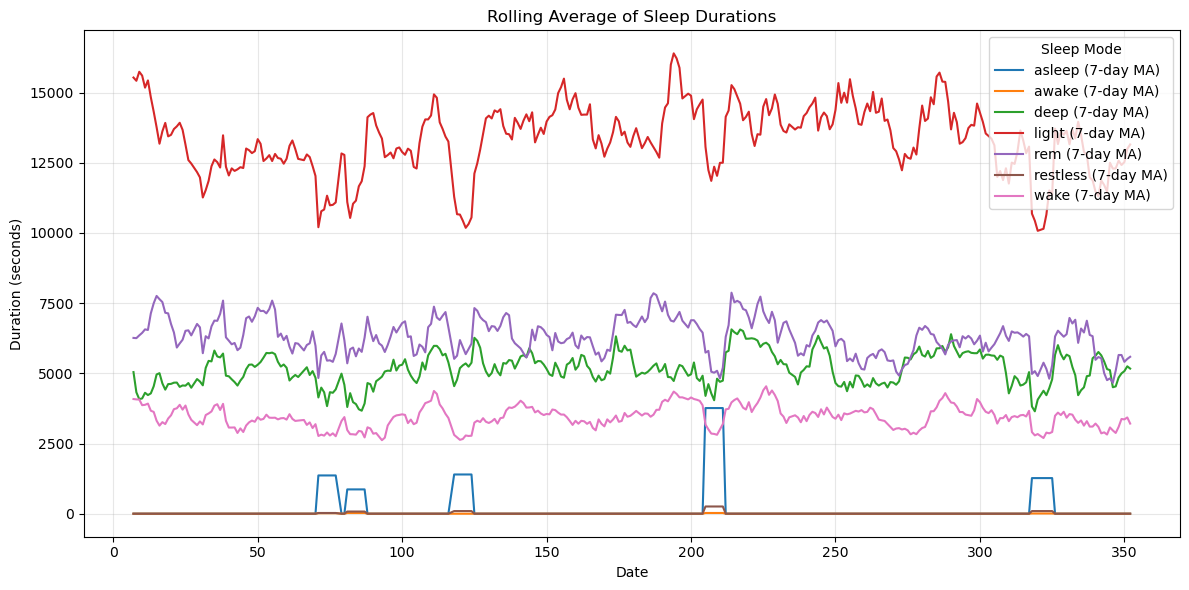

In [51]:
rolling_data = sleep_levels_df.groupby(['sleep_id', 'level'])['seconds'].sum().unstack().fillna(0)

# Compute rolling average
rolling_avg = rolling_data.rolling(window=7).mean()

# Plot rolling average
plt.figure(figsize=(12, 6))
for mode in rolling_avg.columns:
    plt.plot(rolling_avg.index, rolling_avg[mode], label=f'{mode} (7-day MA)')

plt.title('Rolling Average of Sleep Durations')
plt.xlabel('Date')
plt.ylabel('Duration (seconds)')
plt.legend(title='Sleep Mode')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

This is basically the same thing as the previous line chart for the 30d avgs except this is a 7 day average, less smooth, and we can see that it follows eachother much closely. That interesting period I mentioned earlier we can can actually see an intersection and a cross between rem and deep sleep. something that is only seen once or twice.

In [54]:

# Create a transition matrix
levels = sleep_levels_df['level'].unique()
transition_matrix = pd.DataFrame(0, index=levels, columns=levels)

# Count transitions
for i in range(len(sleep_levels_df) - 1):
    current_level = sleep_levels_df.iloc[i]['level']
    next_level = sleep_levels_df.iloc[i + 1]['level']
    transition_matrix.loc[current_level, next_level] += 1

# Normalize to probabilities
transition_matrix = transition_matrix.div(transition_matrix.sum(axis=1), axis=0)

print(transition_matrix)


              wake     light      deep       rem     awake  restless    asleep
wake      0.823227  0.154766  0.001674  0.019734  0.000239  0.000359  0.000000
light     0.277868  0.000000  0.351912  0.370221  0.000000  0.000000  0.000000
deep      0.169555  0.786737  0.000000  0.043708  0.000000  0.000000  0.000000
rem       0.135169  0.861076  0.003755  0.000000  0.000000  0.000000  0.000000
awake     0.000000  0.000000  0.000000  0.000000  0.000000  0.625000  0.375000
restless  0.051282  0.000000  0.000000  0.000000  0.153846  0.000000  0.794872
asleep    0.088235  0.000000  0.000000  0.000000  0.000000  0.911765  0.000000


Here we can see a transition matrix of the cycles. the y axis is from and the x axis is to. so from light to wake there is a 27% chance of that happening. 
Interestingly, from deep sleep there is a 78% chance we go back to light, and a 16% of waking straight up. rarely from deep do we go to rem and rarely from rem to deep. It seems that light sleep is the middle man to go to the different cycles. 

Another thing to think of is what does the data look like in the low probability cases... actually, let's not even assume healthy sleep is the regular during the majority of the cases. Something to keep in mind during the multivariate analysis. 

turns out sleep_score df has the same exact data as the sleep api. i swear it was something different before, but regardless, thats one less thing to have to work on. 
But i did add the stress_score data from the extracted google download data

Google form -> myfitnessplan -> stress score -> univariate analysis writeup and summary -> new notebook for multivariate analysis

In [66]:
form_df = pd.read_csv(data_path + 'initial_clean_gf.csv')

form_df.head()

,timestamp,date,last_sleep_feel,last_sleep_score,daily_particular_qualities,day_feel,ef_status,ef_description,dissatisfied_status,stress_mgmt_score,stress_responsiveness,stress_exertion,stress_sleep
0,7/23/2024 23:22:15,7/23/2024,Bad,NaN,"Mentally Tired, Physically Tired",Good,No,NaN,"None / little work done., Tired.",NaN,NaN,NaN,NaN
1,7/24/2024 23:06:55,7/24/2024,Very Good,NaN,Felt Great Today,Very Good,Yes,Dad made me run errands all day.,None / little work done.,NaN,NaN,NaN,NaN
2,7/26/2024 9:47:16,7/25/2024,Mid,NaN,Normal,Good,Yes,Dad,None / little work done.,NaN,NaN,NaN,NaN
3,7/26/2024 22:51:08,7/26/2024,Very Good,NaN,Felt Great Today,Very Good,No,NaN,Not dissatisfied with anything.,NaN,NaN,NaN,NaN
4,7/29/2024 0:31:44,7/27/2024,Good,NaN,Normal,Good,No,A lot of work to do.,None / little physical activity done.,NaN,NaN,NaN,NaN


In [67]:
form_df.columns

Index(['timestamp', 'date', 'last_sleep_feel', 'last_sleep_score',
       'daily_particular_qualities', 'day_feel', 'ef_status', 'ef_description',
       'dissatisfied_status', 'stress_mgmt_score', 'stress_responsiveness',
       'stress_exertion', 'stress_sleep'],
      dtype='object')

In [68]:
form_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   timestamp                   51 non-null     object 
 1   date                        51 non-null     object 
 2   last_sleep_feel             44 non-null     object 
 3   last_sleep_score            37 non-null     float64
 4   daily_particular_qualities  44 non-null     object 
 5   day_feel                    44 non-null     object 
 6   ef_status                   44 non-null     object 
 7   ef_description              14 non-null     object 
 8   dissatisfied_status         43 non-null     object 
 9   stress_mgmt_score           1 non-null      float64
 10  stress_responsiveness       1 non-null      float64
 11  stress_exertion             1 non-null      float64
 12  stress_sleep                1 non-null      float64
dtypes: float64(5), object(8)
memory usage

In [69]:
#drop these columns because there is only 1 value for them
form_df.drop(columns=['stress_responsiveness', 'stress_exertion', 'stress_sleep', 'stress_mgmt_score'], inplace=True)

In [70]:
string_cols = list(form_df.select_dtypes(include=['object']).columns)
string_cols.remove("timestamp")
string_cols.remove("date")

num_cols = list(form_df.select_dtypes(include=['number']).columns)


for col in string_cols:
    print(f"Column: {col}")
    print(form_df[col].value_counts())

print(num_cols)

Column: last_sleep_feel
last_sleep_feel
Mid          16
Bad          12
Good          8
Very Good     5
Very Bad      3
Name: count, dtype: int64
Column: daily_particular_qualities
daily_particular_qualities
Mentally Tired, Physically Tired                               11
Mentally Tired, Physically Tired, Low Motivation                8
Normal                                                          6
Felt Great Today                                                3
Normal, Low Motivation                                          3
Normal, Felt Great Today                                        3
Mentally Tired, Physically Tired, Felt Sick                     2
Mentally Tired, Physically Tired, Low Motivation, Felt Sick     2
Mentally Tired                                                  1
Low Motivation                                                  1
Mentally Tired, Normal                                          1
Normal, Low Motivation, Felt Sick                               1


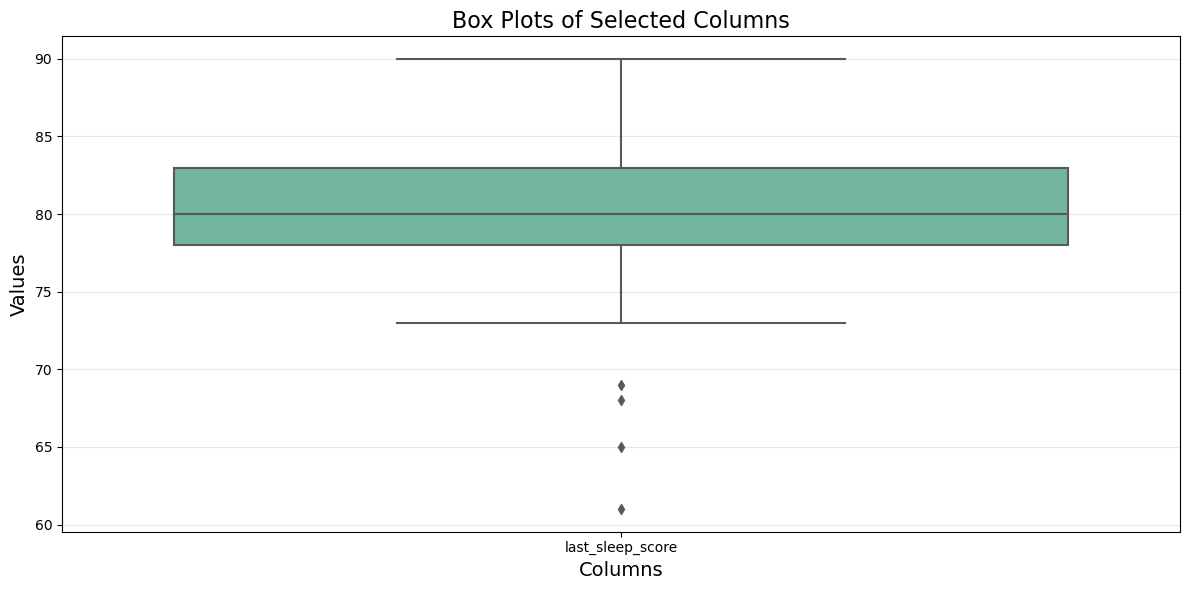

In [71]:
plot_boxplots(form_df, num_cols)

The median is closer to the lower quartile. A lot of the sleep felt mid, a lot of my days (majority) were low in motivation, lazy, tired. Less were great and about the same felt great. 
Life is great lol. (I am happy I swear)

In [72]:
mfp_df = pd.read_csv(data_path + 'initial_clean_mfp.csv')

mfp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   date             85 non-null     object 
 1   meal             85 non-null     object 
 2   calories         85 non-null     float64
 3   fat_g            85 non-null     float64
 4   sat_fat          85 non-null     float64
 5   poly_fat         85 non-null     float64
 6   mono_fat         85 non-null     float64
 7   trans_fat        85 non-null     float64
 8   cholesterol      85 non-null     float64
 9   sodium_mg        85 non-null     float64
 10  potassium        85 non-null     float64
 11  carbohydrates_g  85 non-null     float64
 12  fiber_g          85 non-null     float64
 13  sugar            85 non-null     float64
 14  protein_g        85 non-null     float64
 15  vitamin_a        85 non-null     float64
 16  vitamin_c        85 non-null     float64
 17  calcium          8

In [73]:
mfp_df.describe()

,calories,fat_g,sat_fat,poly_fat,mono_fat,trans_fat,cholesterol,sodium_mg,potassium,carbohydrates_g,fiber_g,sugar,protein_g,vitamin_a,vitamin_c,calcium,iron
count,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.00000,85.000000,85.000000,85.000000,85.000000
mean,789.361176,26.875294,5.982353,2.856471,3.562353,0.152941,115.718824,1277.174118,623.267059,80.036471,7.065882,10.620000,44.24000,14.890588,35.461176,14.178824,21.295294
std,402.365974,19.131935,5.381431,3.950420,4.831099,0.895171,126.866221,1270.707990,525.084232,43.521497,7.660638,8.850744,27.65445,34.356962,69.236711,14.092670,18.271275
min,57.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,522.400000,8.400000,1.500000,0.000000,0.000000,0.000000,0.000000,78.000000,286.500000,50.000000,2.800000,4.000000,21.30000,0.000000,0.000000,4.000000,1.700000
50%,890.000000,28.100000,4.800000,1.000000,1.000000,0.000000,96.400000,1155.200000,555.900000,81.300000,4.400000,8.800000,48.00000,4.000000,9.700000,10.600000,22.600000
75%,1084.600000,40.600000,8.900000,4.300000,6.000000,0.000000,186.400000,1840.000000,859.700000,109.700000,8.200000,14.400000,63.50000,11.400000,26.800000,18.600000,35.000000
max,1803.000000,74.300000,19.500000,18.000000,17.000000,8.200000,638.000000,7469.000000,2577.900000,220.000000,35.100000,38.800000,108.60000,186.800000,408.400000,54.000000,66.300000


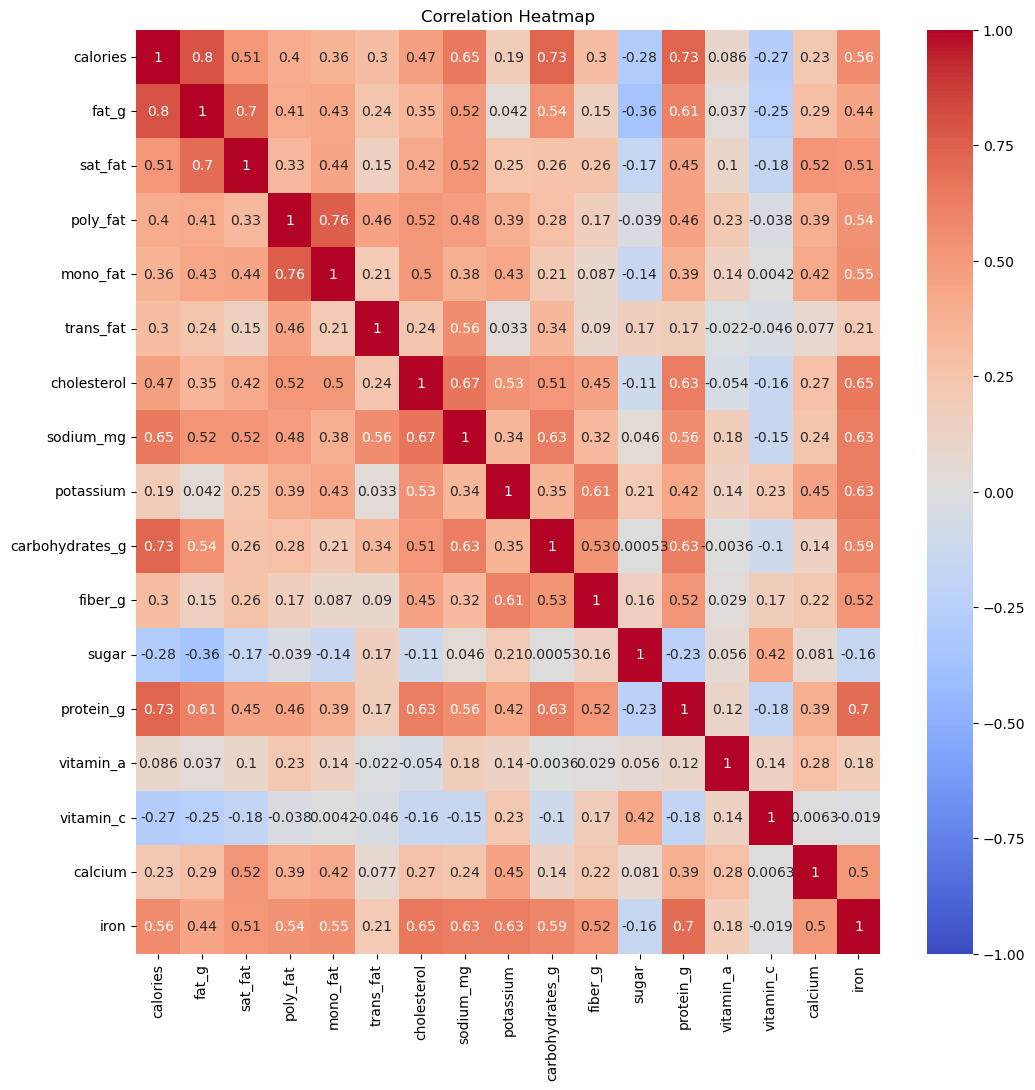

In [77]:
mfp_corr_matrix = mfp_df.iloc[:, 2:].corr()
plt.figure(figsize=(12, 12))
sns.heatmap(
    mfp_corr_matrix, 
    annot=True,        
    cmap="coolwarm",   
    vmin=-1, vmax=1      
)
plt.title("Correlation Heatmap")
plt.show()


Just interesting to see how the variables align with eachother, mfp data will be more important during the multivariate analysis if at all because of the poor sample size.

In [79]:
stress_df = pd.read_csv(data_path + 'stress_score.csv')
stress_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   DATE                       340 non-null    object
 1   UPDATED_AT                 340 non-null    object
 2   STRESS_SCORE               340 non-null    int64 
 3   SLEEP_POINTS               340 non-null    int64 
 4   MAX_SLEEP_POINTS           340 non-null    int64 
 5   RESPONSIVENESS_POINTS      340 non-null    int64 
 6   MAX_RESPONSIVENESS_POINTS  340 non-null    int64 
 7   EXERTION_POINTS            340 non-null    int64 
 8   MAX_EXERTION_POINTS        340 non-null    int64 
 9   STATUS                     340 non-null    object
 10  CALCULATION_FAILED         340 non-null    bool  
dtypes: bool(1), int64(7), object(3)
memory usage: 27.0+ KB


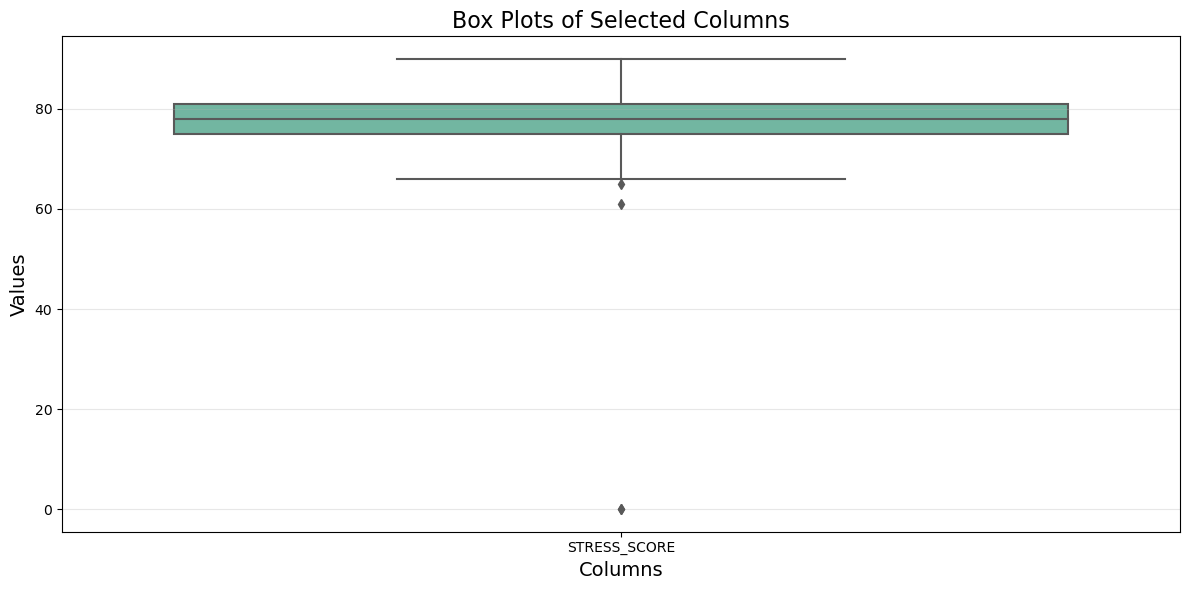

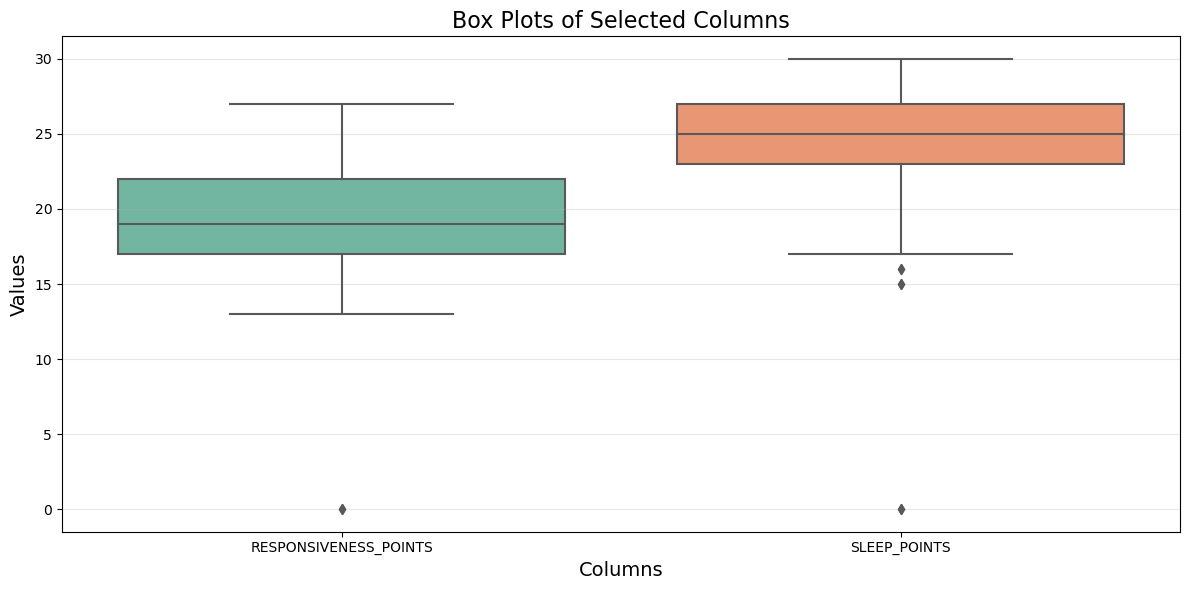

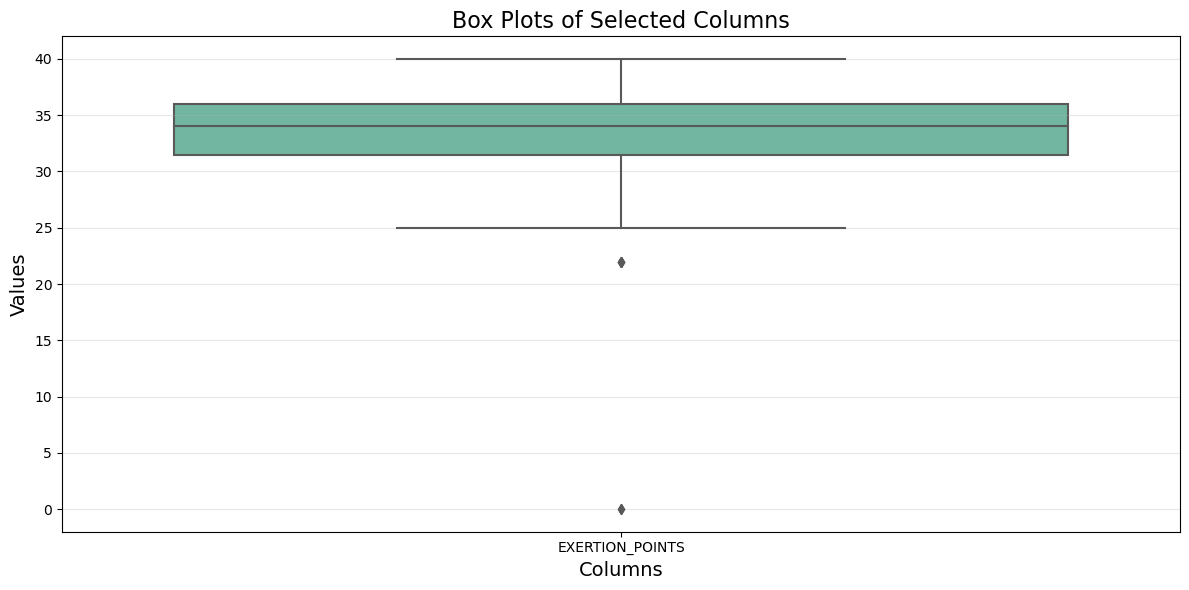

In [80]:
stress_df = stress_df[stress_df['CALCULATION_FAILED'] == False]

plot_boxplots(stress_df, ['STRESS_SCORE'])
plot_boxplots(stress_df, ['RESPONSIVENESS_POINTS', 'SLEEP_POINTS'])
plot_boxplots(stress_df, ['EXERTION_POINTS'])

Quick info:

Sleep points - quality of sleep, based off sleep debt over time, restlessness, how much rem and deep sleep the day before

Physical calmness / responsiveness points - how our automatic nervous system is behaving, to see if it has been very active or not (the ANS is responsible for raising our heart rate, increasing sweat and temperature to prepare us for unexpected dangers and such) ... hrv, elevated resting heart rate, sleeping heart rate above resting heart rate

Activity balance / exertion - balance between too little and too much activities (susceptible to stressors or causing too much fatigue) ... daily steps, weekly activity, fitness level versus exercise fatigue.


my responsiveness / physical calmness has definately been lagging behind the other scores. The other two includes the max score in the range, but can still be improved. The total score of stress has never been above 90s, which is worth noting. Plots all show that they are fairly balanced and normal.